<div class="alert alert-block alert-success">
    <h1 style="margin-bottom:0.5cm"><b>Final Project: Data Analisis</b></h1>
    <p style="margin-bottom:0.25cm">Course 240317: <b>Data Analysis in Rehabilitation</b>
    <br>
        Master in Neuroengineering and Rehabilitation</p>
    <b>Prof. Joan F. Alonso</b>
    <br>
    <b> Students. Ferran Franco, Cristina Montserrat & Jan Pinyol <b>
    <br>
    <br>
</div>

<div class="alert alert-block alert-info">
    <p>In this laboratory, a thorough study has been conducted to examine the differences between EEG signals during different movements, specifically Supination and Hand Closing:</p>
    <ul>
        <li><b>Feature Extraction (through a Matlab code)</b></li>
        <li><b>Exploratory Data Analysis (EDA): Analysis of the dataset to understand it better and have improved results:</b></li>
            <ul>
                <li>NaN analysis and treatment</li>
                <li>Outliers detection</li>
                <li>Correlation matrix</li>
                <li>Histograms</li>
                <li>Density plots</li>
            </ul>
        <li><b>Model Training, Hyperparameter Tuning:</b></li>
            <ul>
                <li>Clustering: test multiple algorithms to visualize how the data is classified into clusters</li>
                <li>Classification: test multiple algorithms trained to differentiate Supination from Hand Closing</li>
            </ul>
        <li><b>Results: testing the classifier on "unseen" EEG</b></li>
        <li><b>Final Conclusion</b></li>
    </ul>
</div>


<div class="alert alert-info" role="alert", style="border-radius: 70px">
    <h2 style="text-align: center; margin-top:0.5cm; margin-bottom:0.5cm; font-size:20px">PART 1: Features extraction</h2>
</div>

This part of the project has been performed through a MATLAB code. Multiple features have been extracted from the different datasets that have been used on the Human Machine Interface course. The final extracted features are:

**TIME-DOMAIN FEATURES:**

- ***Peak to peak:*** Measures the range of the signal amplitude, indicating the highest and lowest points of the waveform.
- ***Mean:*** The average value of the signal. Provides the central tendency of the signal data, giving a sense of the overall level of the signal.
- ***Variance:*** The average of the squared differences from the mean. Indicates the spread of the signal values around the mean, showing how much the signal varies.
- ***Standard Deviation:*** The square root of the variance. It also measures the spread of the signal but in the same units as the signal, making it easier to interpret.
- ***Skewness:*** A measure of the asymmetry of the probability distribution of the signal values. Indicates whether the data are skewed to the left (negative skewness) or right (positive skewness) of the mean.
- ***Kurtosis:*** Indicates the presence of outliers in the data, with higher kurtosis suggesting more extreme outliers.
- ***Higuchi's Fractal Dimension:*** A measure of the complexity of the signal using a fractal dimension method developed by Higuchi. Quantifies the fractal characteristics of the signal, which can be related to its complexity and roughness.
- ***Petrosian Fractal Dimension:*** A measure of the signal complexity that estimates the fractal dimension based on zero-crossings. Provides an estimate of the signal's complexity in a computationally efficient manner.
- ***Root mean square:*** The square root of the mean of the squares of the signal values. Represents the effective value of the varying signal and is used to quantify the magnitude of the signal.


**FREQUENCY-DOMAIN FEATURES:**

- ***Mean frequency:*** The average frequency of the signal, weighted by the power spectral density. Indicates the center of mass of the frequency spectrum, showing where most of the signal's power is concentrated.
- ***Median frequency:*** The frequency that divides the power spectrum into two equal halves. Provides a measure of the frequency content that is less affected by outliers than the mean frequency.
- ***Spectral entropy:*** A measure of the complexity or disorder of the signal in the frequency domain. Quantifies the distribution of power across different frequencies, with higher values indicating a more uniform distribution.
- ***Band power:*** The power of the signal within a specific frequency band. Measures the energy in particular frequency bands (e.g., delta, theta, alpha, beta in EEG signals), which can be linked to different physiological or cognitive states.
- ***Frequency peak:*** The frequency at which the signal has the maximum power. Identifies the dominant frequency component of the signal, which can be indicative of underlying processes or conditions.

In our analysis, features were extracted under three different scenarios in order to try to obtain the best possible results: directly from EEG signals and after using some advanced preprocessing to enhance Slow Cortical Potentials (SCP). This approach also allowed us to compare the efficacy of different preprocessing methods in improving single-trial feature quality.

- `Case 1:` Features extracted directly from EEG signals with basic preprocessing
- `Case 2:` Features extracted after advanced preprocessing: xDAWN
- `Case 3:` Features extracted after advanced preprocessing: Common Spatial Patterns (CSP)


All the data has been previously treated performing the Independent Component Analysis [(ICA)](https://eeglab.org/tutorials/06_RejectArtifacts/RunICA.html). For all our cases, the EEG signal has been preprocessed. ICA is a computational technique used to separate a multivariate signal into additive, independent components. It assumes that the observed data are linear mixtures of unknown independent sources and aims to recover the original sources by maximizing their statistical independence. ICA is widely used in signal processing, particularly for applications like separating mixed audio signals (the "cocktail party problem") and removing artifacts from electroencephalogram (EEG) or functional magnetic resonance imaging (fMRI) data.

For all our cases, the EEG signal has been preprocessed. On each case the data was filtered the same way: 

- `Slow Cortical Potentials (SCP) :` Band-pass filtering with a Butterworth filter of order 4, using cutoff frequencies of 0.3 Hz and 10 Hz. 
- `MU Frequency Band:` Band-pass filtering with a Butterworth filter of order 4, using cutoff frequencies of 8 Hz and 13 Hz.
- `BETA Frequency Band:` Band-pass filtering with a Butterworth filter of order 4, using cutoff frequencies of 14 Hz and 30 Hz.


<div class="alert alert-info" role="alert", style="border-radius: 70px">
    <h2 style="text-align: center; margin-top:0.5cm; margin-bottom:0.5cm; font-size:20px">PART 2: EDA, Outliers, Feature Selection</h2>
</div>

Once all the features have been extracted, the first part of this Jupyter Notebook can be performed. To do so, some steps have been taken. 

### Import libraries

Firstly, we have to import all necessary libraries in order to be sure that the code is working properly. 

### Main functions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, OPTICS
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import davies_bouldin_score, adjusted_mutual_info_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from pathlib import Path
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

Once we have the libraries that will be used, the next step to follow consists in loading the .csv file containing the features extracted and the labels according to the two types of movement that will be studied on this Jupyter Notebook  (**SUPINATION & CLOSE-HAND**).

## CASE 1: Features extracted directly from raw EEG signals

In the first scenario, features were extracted directly from the raw EEG signals with basic preprocessing. This approach captures the intrinsic characteristics of the EEG data as they are recorded.

#### Load the data

In [2]:
# Read the data
data = pd.read_csv("features_ICA.csv", delimiter = ',')

# Clean the column names by replacing non-breaking spaces with regular spaces
data.columns = data.columns.str.replace('\xa0', ' ')

# Visualize the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PeakToPeak_SCP        964 non-null    float64
 1   Max_SCP               964 non-null    float64
 2   Mean_SCP              964 non-null    float64
 3   Var_SCP               964 non-null    float64
 4   Std_SCP               964 non-null    float64
 5   Skew_SCP              964 non-null    float64
 6   Kurt_SCP              964 non-null    float64
 7   HiguchiFD_SCP         964 non-null    float64
 8   PetrosianFD_SCP       964 non-null    float64
 9   MeanFreq_SCP          964 non-null    float64
 10  MedianFreq_SCP        964 non-null    float64
 11  RMS_SCP               964 non-null    float64
 12  spectralEntropy_SCP   964 non-null    float64
 13  PeakToPeak_Mu         964 non-null    float64
 14  Max_Mu                964 non-null    float64
 15  Mean_Mu               9

To be sure that we have an equilibred dataset, we can visualize how many instances are considered for Supination and how many for Close-Hand.

In [3]:
count_n_sup = (data['SUPINATION'] == 1).sum()
count_n_close = (data['SUPINATION'] == 0).sum()
print("Supination samples: " + str(count_n_sup));
print("Close hand samples: " + str(count_n_close));

Supination samples: 451
Close hand samples: 513


As it can be seen, more or less the number of samples is similar. We can say that the dataset is almost 50-50 for each case. 

To be sure that we are working with numbers and not strings, a conversion is done to allow the classifiers and clustering methods to understand the data.

In [4]:
for column in data.columns:
    if column != 'SUPINATION':
        data[column] = pd.to_numeric(data[column], errors='coerce')
        
data.describe()

PeakToPeak_SCP     Max_SCP    Mean_SCP     Var_SCP     Std_SCP  \
count      964.000000  964.000000  964.000000  964.000000  964.000000   
mean        20.620918    9.456383    0.009263   12.349472    3.375833   
std          7.701942    3.865137    0.146727    8.422279    0.976840   
min         10.113337    4.360393   -0.820001    3.417076    1.848533   
25%         15.460775    7.283476   -0.075725    7.389782    2.718415   
50%         18.691631    8.646601    0.007102    9.771211    3.125894   
75%         24.130746   10.592017    0.091488   13.953942    3.735496   
max         86.950686   49.673458    0.679456   90.945234    9.536521   

         Skew_SCP    Kurt_SCP  HiguchiFD_SCP  PetrosianFD_SCP  MeanFreq_SCP  \
count  964.000000  964.000000     964.000000       964.000000    964.000000   
mean    -0.225976    4.120188       0.044230         0.032716     -0.015239   
std      0.613436    1.919284       0.013037         0.017643      0.003879   
min     -3.043250    2.138497       0.015116         0.009204     -0.027126   
25%     -0.526433    2.944432       0.034319         0.021476     -0.017758   
50%     -0.093663    3.457715       0.041574         0.027612     -0.014550   
75%      0.166020    4.551872       0.051932         0.038350     -0.012250   
max      2.208821   15.841047       0.090738         0.115049     -0.007866   

       ...   Kurt_Beta  HiguchiFD_Beta  PetrosianFD_Beta  MeanFreq_Beta  \
count  ...  964.000000      964.000000        964.000000     964.000000   
mean   ...    3.737026        0.256182          0.251616      -0.135192   
std    ...    1.945717        0.006763          0.009997       0.007761   
min    ...    2.437299        0.234102          0.220893      -0.167654   
25%    ...    3.073537        0.251910          0.245437      -0.140181   
50%    ...    3.350162        0.256083          0.251573      -0.135135   
75%    ...    3.788967        0.260248          0.257709      -0.129833   
max    ...   30.616727        0.294109          0.309864      -0.111984   

       MedianFreq_Beta    RMS_Beta  Bandpower_Beta  freqPeakPSD_Beta  \
count       964.000000  964.000000      964.000000        964.000000   
mean          1.004228    1.721662        3.255097          0.238429   
std           0.000123    0.539704        1.983515          0.034226   
min           1.003862    0.848210        0.719460          0.176408   
25%           1.004148    1.245121        1.550328          0.211689   
50%           1.004229    1.668278        2.783152          0.234699   
75%           1.004309    2.152859        4.634804          0.260777   
max           1.004617    3.195473       10.211048          0.357418   

       spectralEntropy_Beta  SUPINATION  
count            964.000000  964.000000  
mean               6.394675    0.467842  
std                0.131086    0.499224  
min                5.891955    0.000000  
25%                6.320096    0.000000  
50%                6.406456    0.000000  
75%                6.481359    1.000000  
max                6.764095    1.000000  

[8 rows x 44 columns]

***Null values analysis***

To be 100% sure that there are no Nan values a further analysis has been performed. A null extraction has been performed on the Matlab code but this is a standard analysis that has to be done in order to be sure that there are no null values along all the data. 

In [5]:
data.isnull().sum()

PeakToPeak_SCP          0
Max_SCP                 0
Mean_SCP                0
Var_SCP                 0
Std_SCP                 0
Skew_SCP                0
Kurt_SCP                0
HiguchiFD_SCP           0
PetrosianFD_SCP         0
MeanFreq_SCP            0
MedianFreq_SCP          0
RMS_SCP                 0
spectralEntropy_SCP     0
PeakToPeak_Mu           0
Max_Mu                  0
Mean_Mu                 0
Var_Mu                  0
Std_Mu                  0
Skew_Mu                 0
Kurt_Mu                 0
HiguchiFD_Mu            0
PetrosianFD_Mu          0
MeanFreq_Mu             0
MedianFreq_Mu           0
RMS_Mu                  0
Bandpower_Mu            0
freqPeakPSD_Mu          0
spectralEntropy_Mu      0
PeakToPeak_Beta         0
Max_Beta                0
Mean_Beta               0
Var_Beta                0
Std_Beta                0
Skew_Beta               0
Kurt_Beta               0
HiguchiFD_Beta          0
PetrosianFD_Beta        0
MeanFreq_Beta           0
MedianFreq_B

As it is seen in the previous print, the previous elimination of Nan values done in the Matlab code has worked properly. So now that we have all the data loaded and without any NaN values, the exploratory data analysis can proceed.


**Outliers detection**

On this section,the outliers detection has been performed. It must be taken into account that all the data must be previously standarized in order to do the proper fitting. 

In [6]:
from sklearn.preprocessing import StandardScaler

# Separate the SUPINATION column
supination = data['SUPINATION']
features = data.drop(columns=['SUPINATION'])

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Create a DataFrame for the standardized features
df_standardized = pd.DataFrame(features_standardized, columns=features.columns)

# Add the SUPINATION column back to the standardized DataFrame
df_standardized['SUPINATION'] = supination.reset_index(drop=True)

# Optionally display the standardized DataFrame
df_standardized.describe()


PeakToPeak_SCP       Max_SCP      Mean_SCP       Var_SCP       Std_SCP  \
count    9.640000e+02  9.640000e+02  9.640000e+02  9.640000e+02  9.640000e+02   
mean    -3.611680e-16  8.107853e-17 -9.213469e-19 -6.633698e-17 -4.422465e-16   
std      1.000519e+00  1.000519e+00  1.000519e+00  1.000519e+00  1.000519e+00   
min     -1.364985e+00 -1.319134e+00 -5.654673e+00 -1.061118e+00 -1.564322e+00   
25%     -6.703273e-01 -5.624727e-01 -5.795239e-01 -5.891830e-01 -6.733536e-01   
50%     -2.506236e-01 -2.096179e-01 -1.473369e-02 -3.062828e-01 -2.559978e-01   
75%      4.559435e-01  2.939674e-01  5.606886e-01  1.906019e-01  3.683821e-01   
max      8.616554e+00  1.041049e+01  4.569987e+00  9.336731e+00  6.310028e+00   

           Skew_SCP      Kurt_SCP  HiguchiFD_SCP  PetrosianFD_SCP  \
count  9.640000e+02  9.640000e+02   9.640000e+02     9.640000e+02   
mean   5.528081e-17  2.211233e-16  -7.370775e-18    -2.948310e-17   
std    1.000519e+00  1.000519e+00   1.000519e+00     1.000519e+00   
min   -4.594999e+00 -1.033052e+00  -2.234381e+00    -1.333389e+00   
25%   -4.900480e-01 -6.129194e-01  -7.606500e-01    -6.374566e-01   
50%    2.158038e-01 -3.453457e-01  -2.038490e-01    -2.894905e-01   
75%    6.393476e-01  2.250360e-01   5.910815e-01     3.194502e-01   
max    3.971175e+00  6.110062e+00   3.569360e+00     4.669027e+00   

       MeanFreq_SCP  ...     Kurt_Beta  HiguchiFD_Beta  PetrosianFD_Beta  \
count  9.640000e+02  ...  9.640000e+02    9.640000e+02      9.640000e+02   
mean   5.896620e-17  ...  4.422465e-17   -3.022018e-16      6.873248e-16   
std    1.000519e+00  ...  1.000519e+00    1.000519e+00      1.000519e+00   
min   -3.066322e+00  ... -6.683406e-01   -3.266675e+00     -3.074775e+00   
25%   -6.496849e-01  ... -3.411766e-01   -6.321258e-01     -6.183949e-01   
50%    1.777901e-01  ... -1.989315e-01   -1.473727e-02     -4.299939e-03   
75%    7.712130e-01  ...  2.670865e-02    6.014435e-01      6.097951e-01   
max    1.902059e+00  ...  1.382197e+01    5.610939e+00      5.829603e+00   

       MeanFreq_Beta  MedianFreq_Beta      RMS_Beta  Bandpower_Beta  \
count   9.640000e+02     9.640000e+02  9.640000e+02    9.640000e+02   
mean   -3.493747e-15    -3.548807e-13 -1.621571e-16   -4.422465e-17   
std     1.000519e+00     1.000519e+00  1.000519e+00    1.000519e+00   
min    -4.184934e+00    -2.965296e+00 -1.619230e+00   -1.279019e+00   
25%    -6.430787e-01    -6.443194e-01 -8.834245e-01   -8.599148e-01   
50%     7.449904e-03     4.809665e-03 -9.896469e-02   -2.380575e-01   
75%     6.909671e-01     6.536138e-01  7.993668e-01    6.959475e-01   
max     2.992028e+00     3.153108e+00  2.732194e+00    3.508701e+00   

       freqPeakPSD_Beta  spectralEntropy_Beta  SUPINATION  
count      9.640000e+02          9.640000e+02  964.000000  
mean      -3.316849e-17          2.137525e-15    0.467842  
std        1.000519e+00          1.000519e+00    0.499224  
min       -1.813064e+00         -3.837033e+00    0.000000  
25%       -7.816792e-01         -5.692267e-01    0.000000  
50%       -1.090369e-01          8.991526e-02    0.000000  
75%        6.532910e-01          6.616181e-01    1.000000  
max        3.478389e+00          2.819617e+00    1.000000  

[8 rows x 44 columns]

Once the data has been standarized, it's time to plot the outliers with the use of automatic tools such as DBSCAN or OPTICS that are two Density-based algorithms that are very good to detect automatically outliers. 

  File "C:\Users\Ferran\anaconda3\envs\data_analysis\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


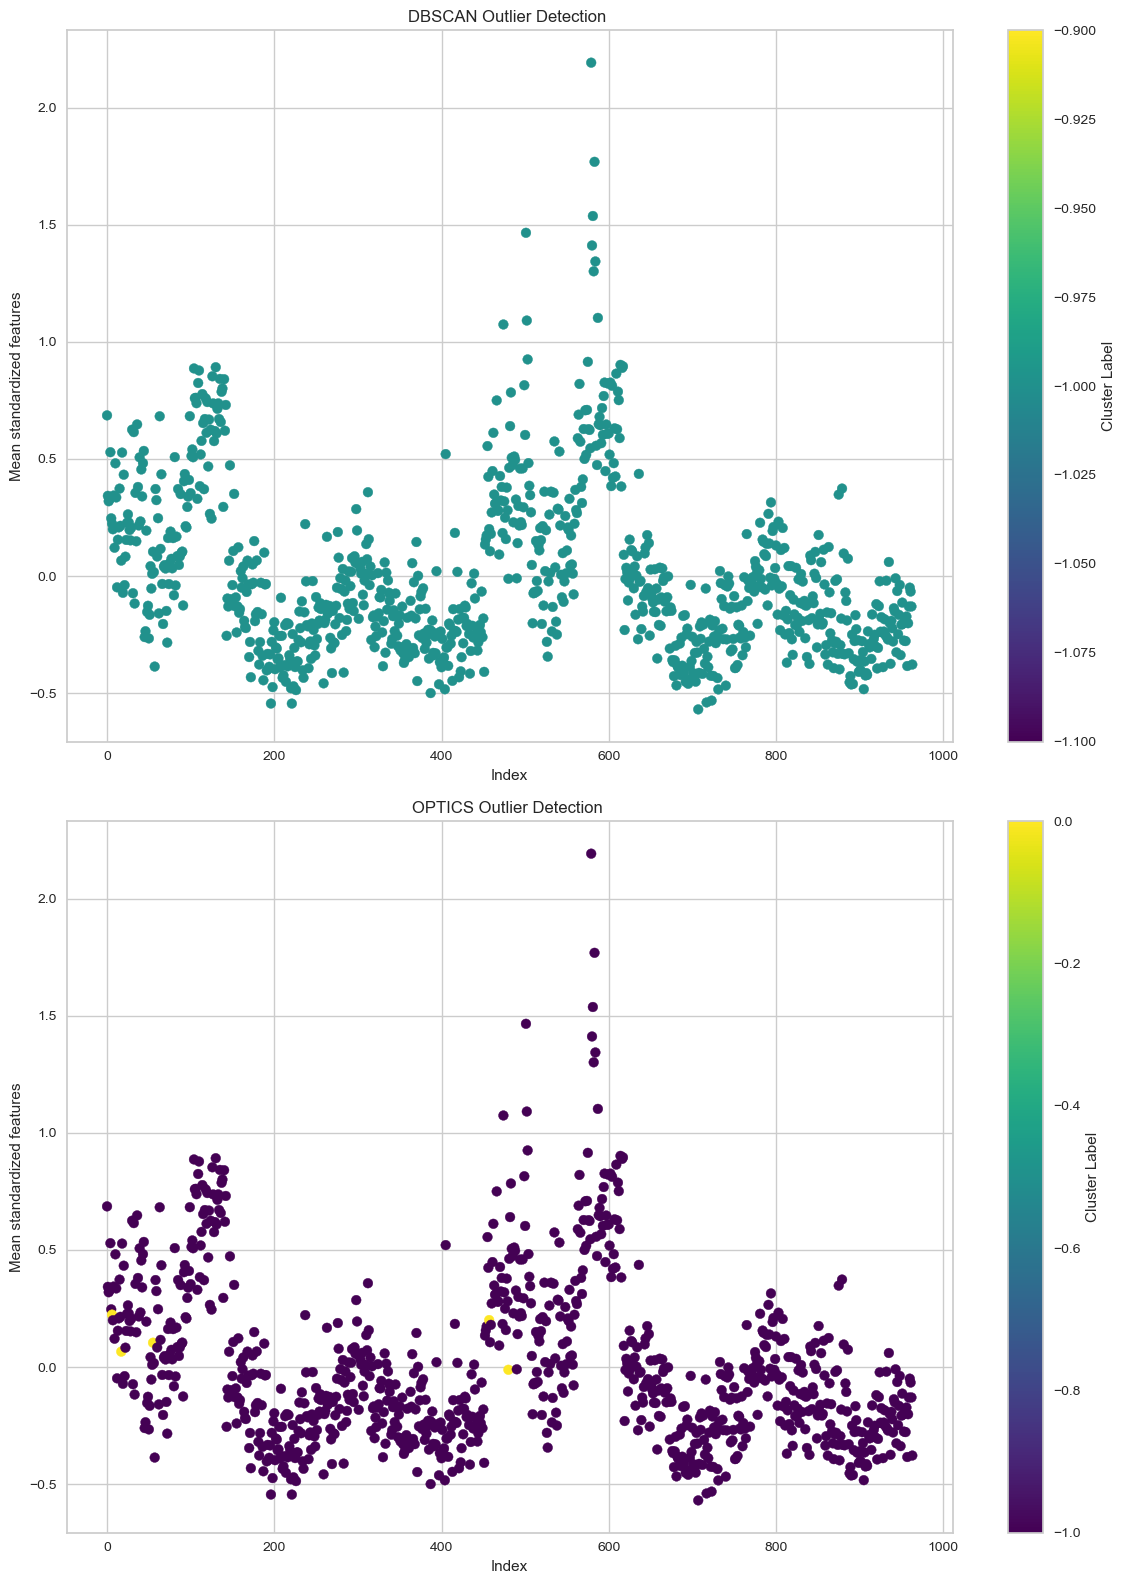

In [7]:
# Function to plot outliers
def outliers_plot(ax, features_df, outliers, model='', extra_feature=''):
    scatter = ax.scatter(range(len(features_df)), features_df.mean(axis=1), c=outliers, cmap='viridis')
    ax.set_xlabel('Index')
    ax.set_ylabel('Mean standardized features')
    ax.set_title(f'{model} Outlier Detection {extra_feature}')
    plt.colorbar(scatter, ax=ax, label='Cluster Label')

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features_standardized)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
outliers_dbscan = dbscan.fit_predict(features_imputed)

# Apply OPTICS clustering
optics = OPTICS(min_samples=5)
labels_optics = optics.fit_predict(features_imputed)

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 16))

# Visualization for DBSCAN
outliers_plot(axes[0], features_imputed, outliers_dbscan, 'DBSCAN')

# Visualization for OPTICS
outliers_plot(axes[1], features_imputed, labels_optics, 'OPTICS')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Extract outliers (data points labeled as -1 by OPTICS)
outliers_indices_optics = np.where(labels_optics == -1)[0]
outliers_optics = features_imputed[outliers_indices_optics]


DBSCAN has identified several points as outliers, visible as those significantly deviating from the main cluster group. A notable group of outliers appears around indices 200 to 300 and a few around index 600. As it can be see, with this method didn't manage to relate the outlier points from outside the mean with another color. But at plane sight it can be seen that the outliers are significantly deviating from the main cluster group. 

This can also be seen using the OPTICS. It identifies outliers more precisely, shown in colors like yellow, blue and green within a primarily purple cluster. Outliers are more spread out, particularly visible around indices 100 to 300 and 600, similar to DBSCAN but with more refinement.

Comparing both methods, it can be seen that both methods identify outliers in similar regions (indices 100-300 and around 600), suggesting consistency in detection prominent outliers. 

There are many features to be analyzed, when performing the pairplot it lasts too much. To avoid this lines of code, the sns.displot() function can provide the same information for the two selected features that there's interest in visualize. 

In [8]:
# There are many different features and the pairplot takes a lot of time in order to appear on the screen. This information will be seen throught the correlation 
#matrix and the different plots performed to analyze the data. 

# pairplot 
# g = sns.pairplot(data, hue="SUPINATION")

To know what features are interesting to be visualized, the correlation matrix is a useful tool that will provide us with this information. 

**Correlation Matrix**

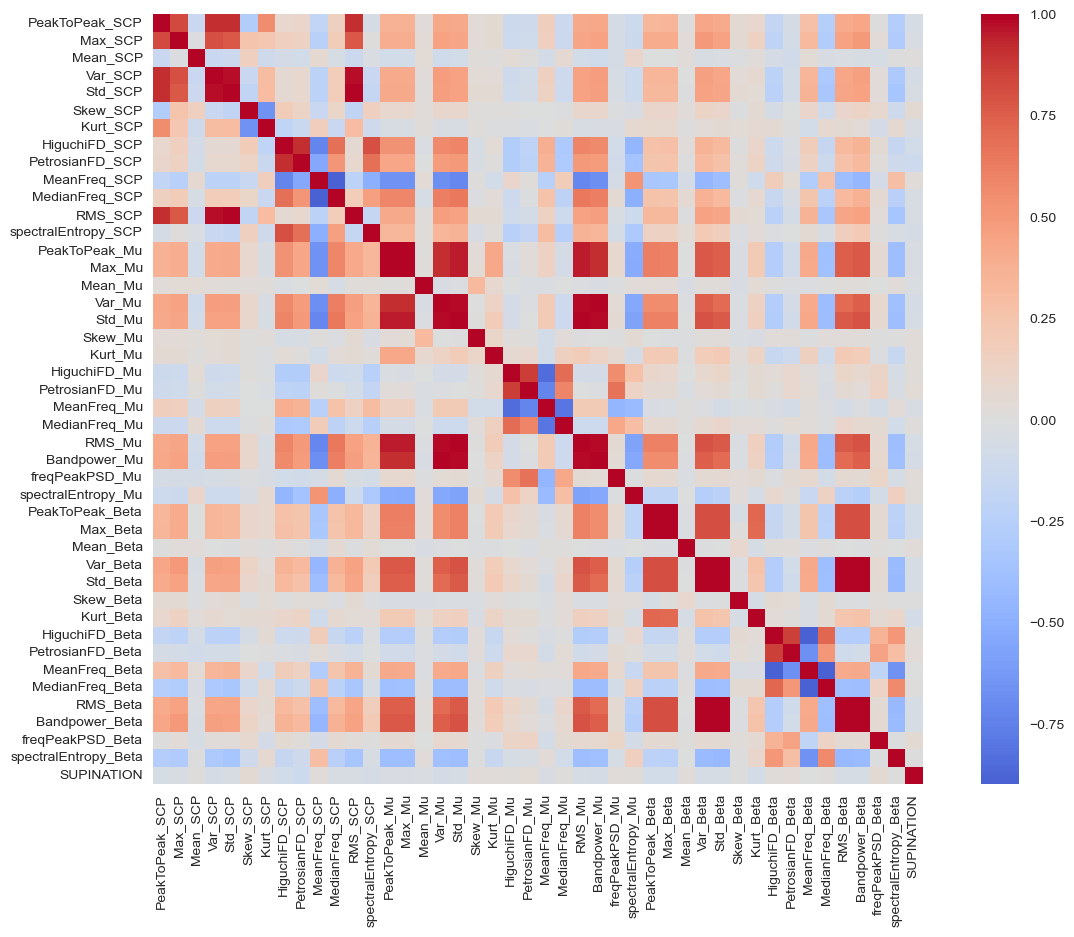

In [9]:
fig, ax = plt.subplots(figsize=(15, 10))  # Create a single axis
corrmat = df_standardized.corr(numeric_only=True)
sns.heatmap(corrmat, annot=False, square=True, cmap="coolwarm", center=0);

From this correlation matrix it can be seen that there are some features that are more related with SUPINATION outcome than some others. These features are:

- Mean_SCP
- Skew_SCP
- MeanFreq_SCP
- PetrosianFD_Mu
- MedianFreq_Beta
- Mean_Beta

As it can be seen, these results are not really good. That is why some other methodologies have been pursued in order to try to improve our features. 

To keep investigating on the dataset, some Histograms or Density plots can be performed with the desired features that have been previously selected thanks to the correlation matrix. 

In [10]:
# Define the features to plot
features = ['Mean_SCP','Skew_SCP', 'MeanFreq_SCP', 'PetrosianFD_Mu','MedianFreq_Beta', 'Mean_Beta']

**Joint Histograms**

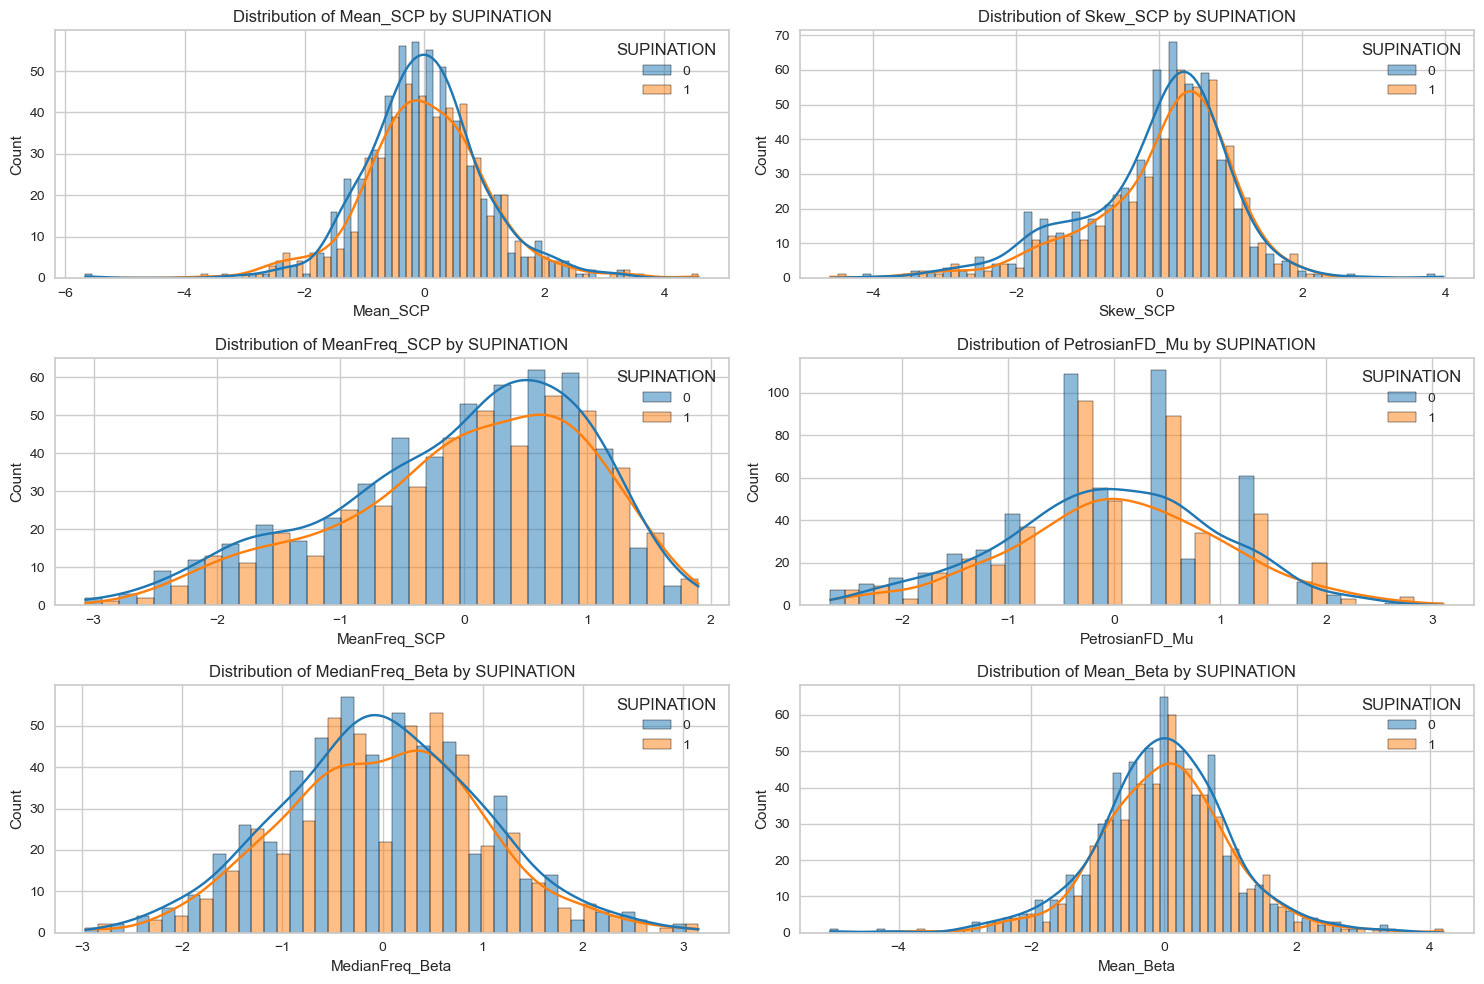

In [11]:
# Define a custom color palette
custom_colors = ['#1f77b4', '#ff7f0e']  # Example: blue and orange

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features):
    sns.histplot(data=df_standardized, x=feature, hue="SUPINATION", multiple="dodge", ax=axes[i], kde=True, palette=custom_colors)
    axes[i].set_title(f'Distribution of {feature} by SUPINATION')

# Adjust layout
plt.tight_layout()
plt.show()

**Density Plot**

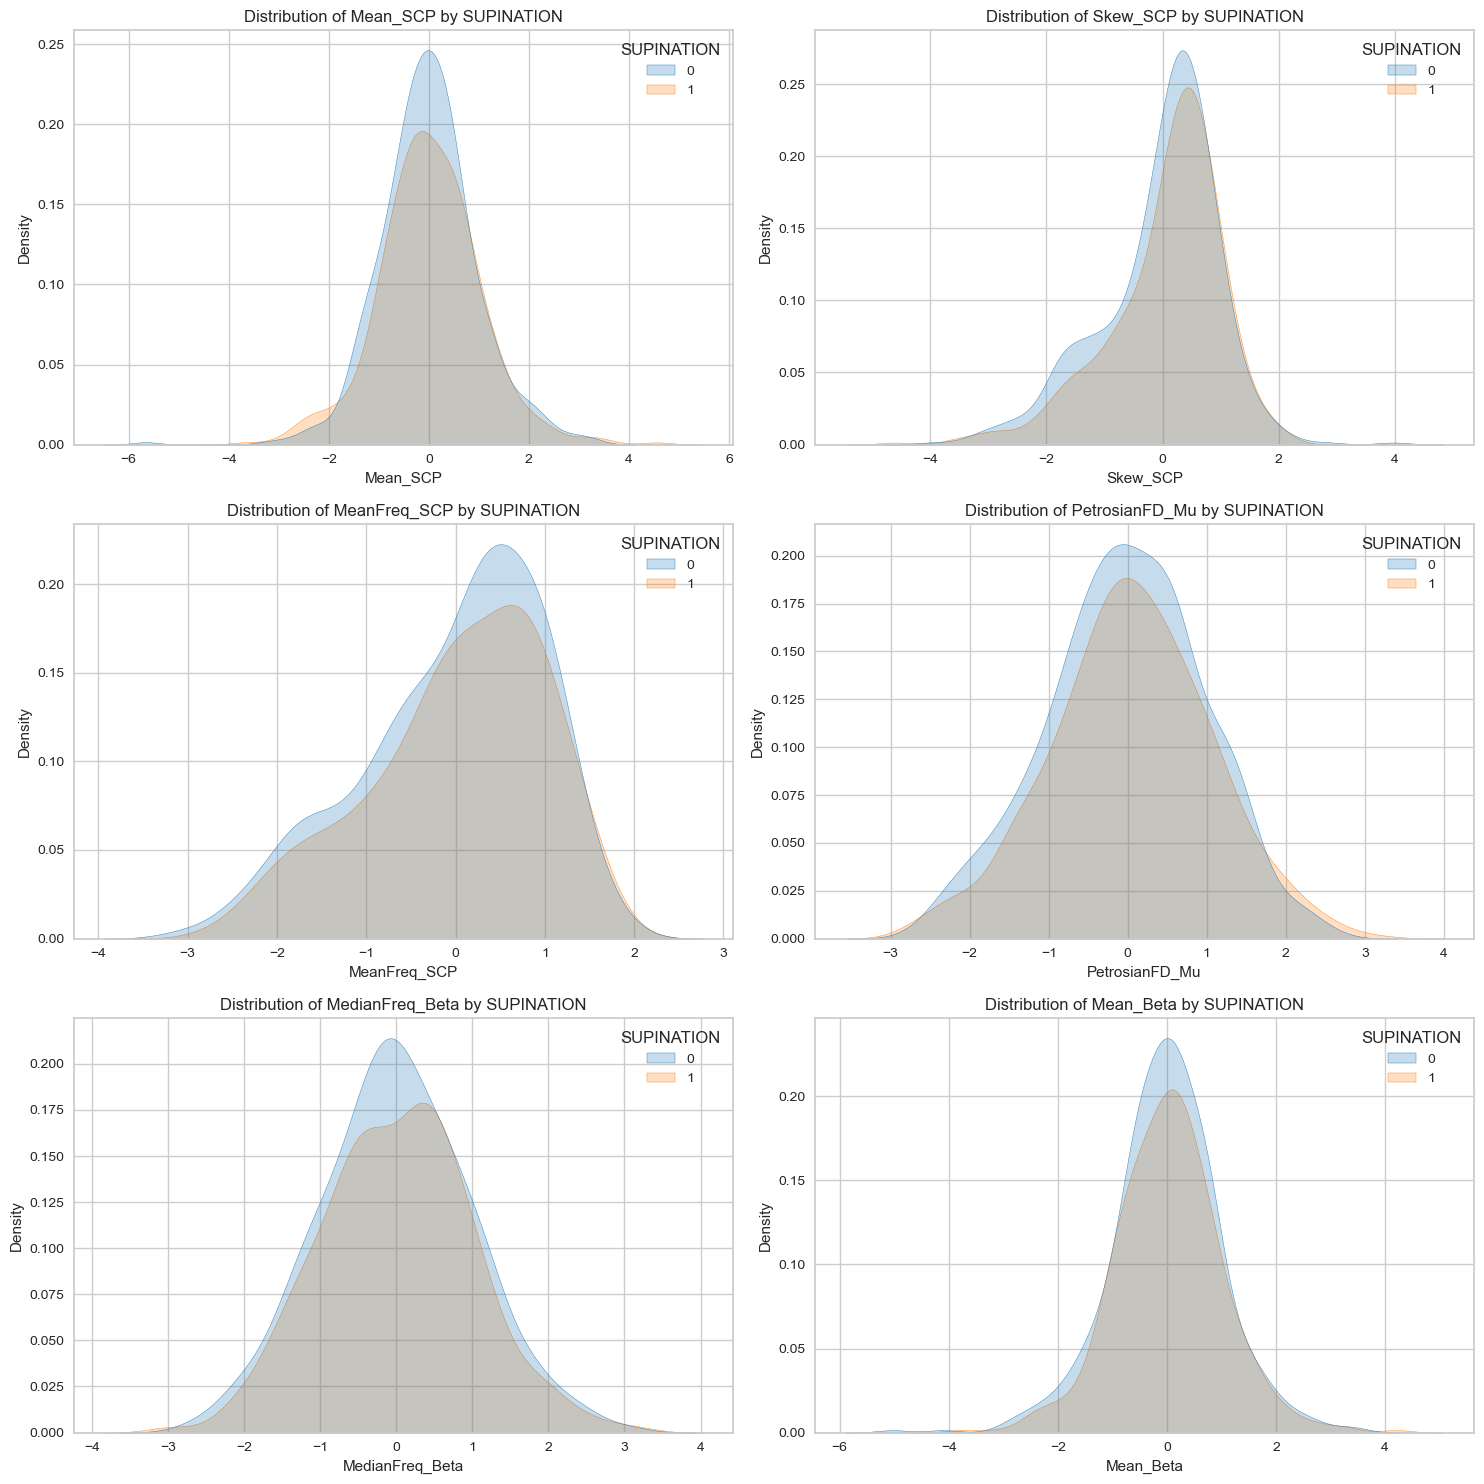

In [12]:
# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features):
    sns.kdeplot(data=df_standardized, x=feature, hue="SUPINATION", fill=True, ax=axes[i],palette=custom_colors)
    axes[i].set_title(f'Distribution of {feature} by SUPINATION')

# Adjust layout
plt.tight_layout()
plt.show()

From the previous plots the following information can be extracted: 

In [13]:
from IPython.display import display, Markdown

# Observations
info = {
    "Feature": [
        "Mean_SCP", "Skew_SCP", "MeanFreq_SCP", "PetrosianFD_Mu", "MedianFreq_Beta", "Mean_Beta"
    ],
    "Joint Histogram & Density Plots ": [
        "Both groups have a similar count distribution, with peaks around 0. The histograms are symmetric, indicating that the feature values are normally distributed.",
        "The count distributions for both groups are similar, with a peak around 0. The histograms are slightly skewed but overlap significantly.",
        "The count distributions for both groups have peaks around -1 and 0. The histograms overlap, with a slight difference in the peak positions.",
        "The count distributions for both groups are centered around 0, with similar shapes. The histograms overlap significantly, showing no clear separation.",
        "The count distributions for both groups show a peak around 0. The histograms overlap significantly, indicating similar distributions for both groups.",
        "The count distributions for both groups show a peak around 0. The histograms overlap significantly, showing similar distribution patterns for both groups."
    ],
}

# Create a DataFrame
df = pd.DataFrame(info)

# Format the table as Markdown
markdown_table = """
| Feature | Joint Histogram & Density Plots |
|---------|--------------------------------|
"""
for i in range(len(df)):
    markdown_table += f"| {df['Feature'][i]} | {df['Joint Histogram & Density Plots '][i]} |\n"

# Display the Markdown table
display(Markdown(markdown_table))




| Feature | Joint Histogram & Density Plots |
|---------|--------------------------------|
| Mean_SCP | Both groups have a similar count distribution, with peaks around 0. The histograms are symmetric, indicating that the feature values are normally distributed. |
| Skew_SCP | The count distributions for both groups are similar, with a peak around 0. The histograms are slightly skewed but overlap significantly. |
| MeanFreq_SCP | The count distributions for both groups have peaks around -1 and 0. The histograms overlap, with a slight difference in the peak positions. |
| PetrosianFD_Mu | The count distributions for both groups are centered around 0, with similar shapes. The histograms overlap significantly, showing no clear separation. |
| MedianFreq_Beta | The count distributions for both groups show a peak around 0. The histograms overlap significantly, indicating similar distributions for both groups. |
| Mean_Beta | The count distributions for both groups show a peak around 0. The histograms overlap significantly, showing similar distribution patterns for both groups. |


From the information earned by the last plots and the correlation matrix, some further investigation has been performed for the interesting features and the logarithm of them, to see if the results where better. 

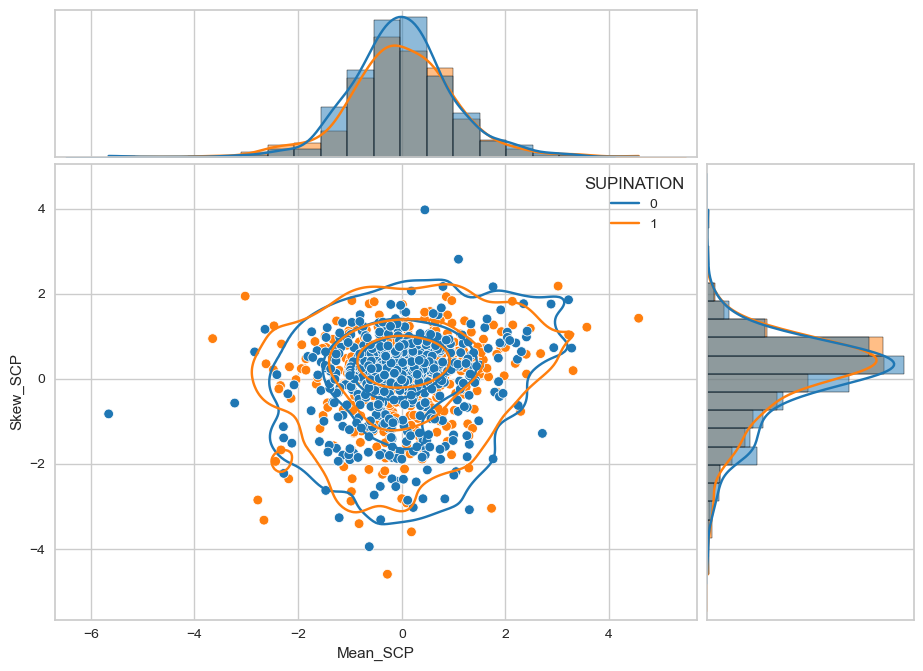

In [14]:
# Create the joint plot with a more visible color palette
g = sns.jointplot(data=df_standardized, x="Mean_SCP", y="Skew_SCP", hue="SUPINATION", ratio=3, space=0.05,palette=custom_colors)
g.plot_joint(sns.kdeplot, levels=4)
g.plot_marginals(sns.histplot, bins=20, kde=True)
sns.despine(top=False, right=False)
g.fig.set_figheight(7)
g.fig.set_figwidth(10)
plt.show()

The scatter plot shows that there is some clustering of points, indicating a relationship between these variables. The marginal histograms suggest that both Mean_SCP and Skew_SCP are normally distributed.

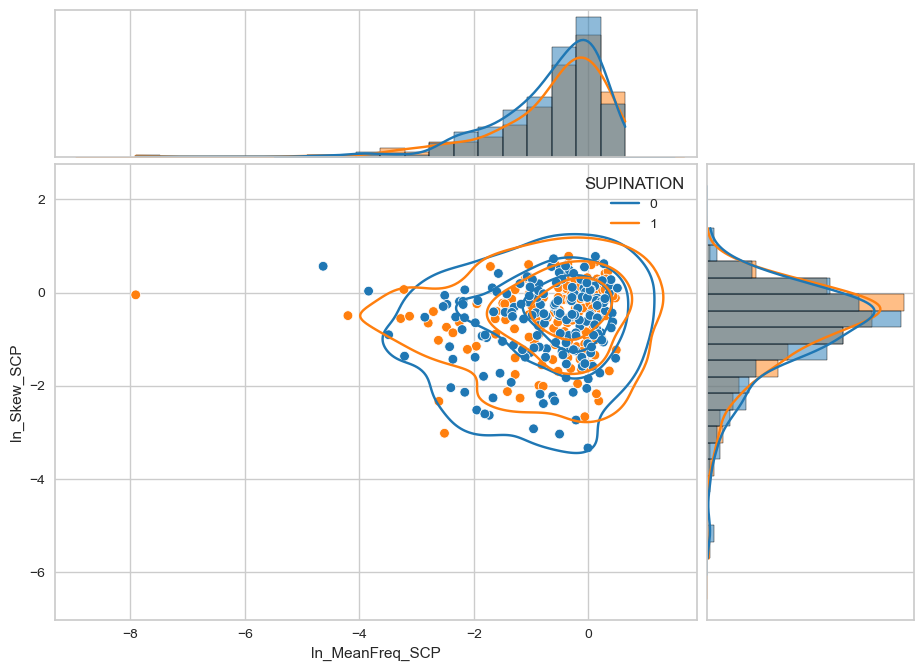

In [15]:
df_standardized['ln_MeanFreq_SCP'] = np.log(df_standardized['MeanFreq_SCP'])
df_standardized['ln_Skew_SCP'] = np.log(df_standardized['Skew_SCP'])


g = sns.jointplot(data=df_standardized, x="ln_MeanFreq_SCP", y="ln_Skew_SCP", hue="SUPINATION", ratio=3, space=0.05,palette=custom_colors)
g.plot_joint(sns.kdeplot, levels=4)
g.plot_marginals(sns.histplot, bins=20, kde=True)
sns.despine(top=False, right=False)
g.fig.set_figheight(7)
g.fig.set_figwidth(10)

The contours show that the majority of the data points are clustered in a specific region, and the relationship between these variables is more evident after the transformation. The log transformation helps in stabilizing the variance and making the distribution more normal-like.

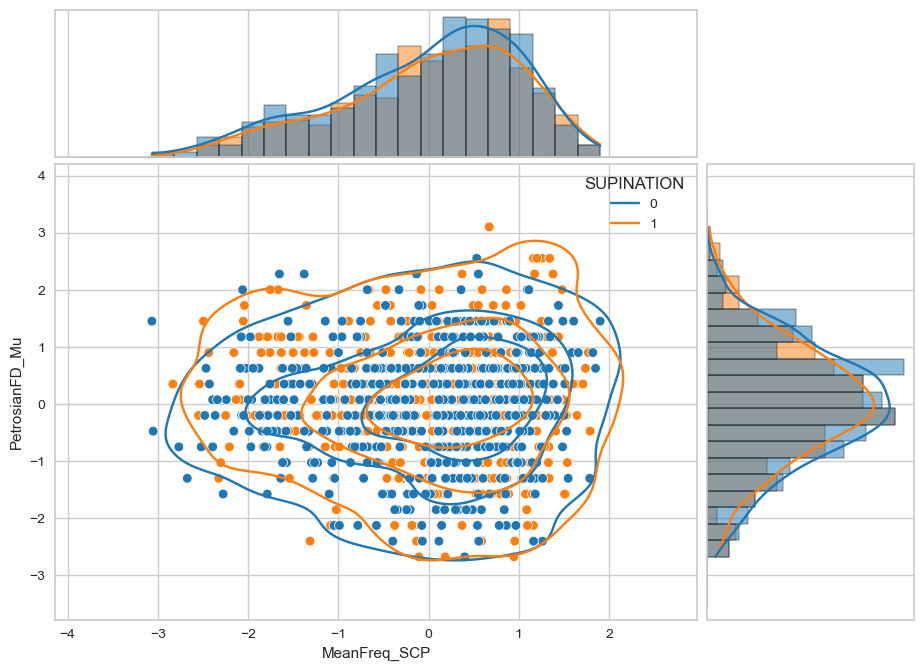

In [16]:
g = sns.jointplot(data=df_standardized, x="MeanFreq_SCP", y="PetrosianFD_Mu", hue="SUPINATION", ratio=3, space=0.05,palette=custom_colors)
g.plot_joint(sns.kdeplot, levels=4)
g.plot_marginals(sns.histplot, bins=20, kde=True)
sns.despine(top=False, right=False)
g.fig.set_figheight(7)
g.fig.set_figwidth(10)

The scatter plot, along with KDE contours, suggests a clustering pattern.

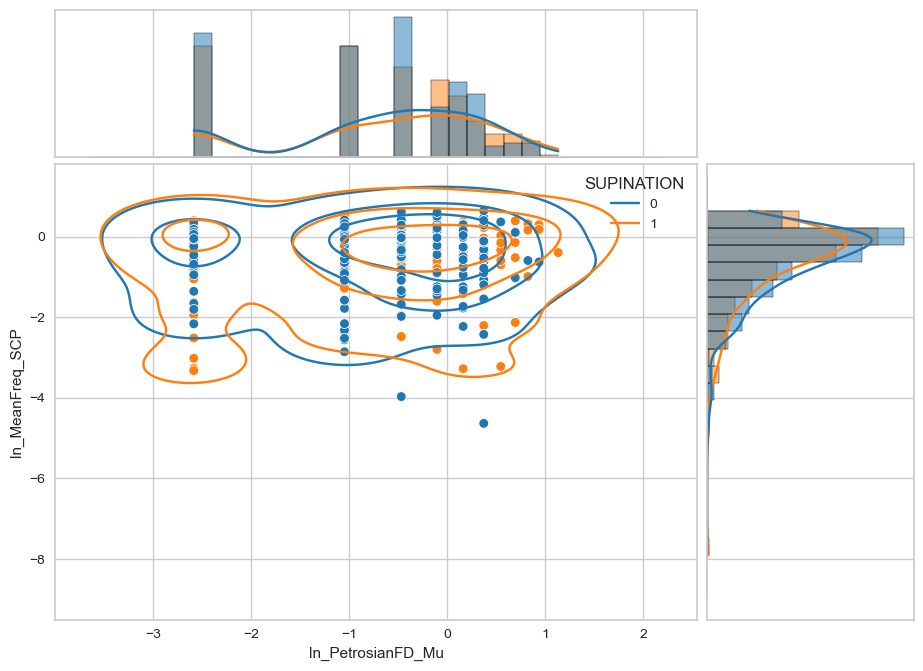

In [17]:
df_standardized['ln_PetrosianFD_Mu'] = np.log(df_standardized['PetrosianFD_Mu'])
df_standardized['ln_MeanFreq_SCP'] = np.log(df_standardized['MeanFreq_SCP'])

g = sns.jointplot(data=df_standardized, x="ln_PetrosianFD_Mu", y="ln_MeanFreq_SCP", hue="SUPINATION", ratio=3, space=0.05,palette=custom_colors)
g.plot_joint(sns.kdeplot, levels=4)
g.plot_marginals(sns.histplot, bins=20, kde=True)
sns.despine(top=False, right=False)
g.fig.set_figheight(7)
g.fig.set_figwidth(10)

The log transformation reveals a clearer relationship and clustering pattern between the two variables.The KDE contours are more distinct, showing higher density regions.

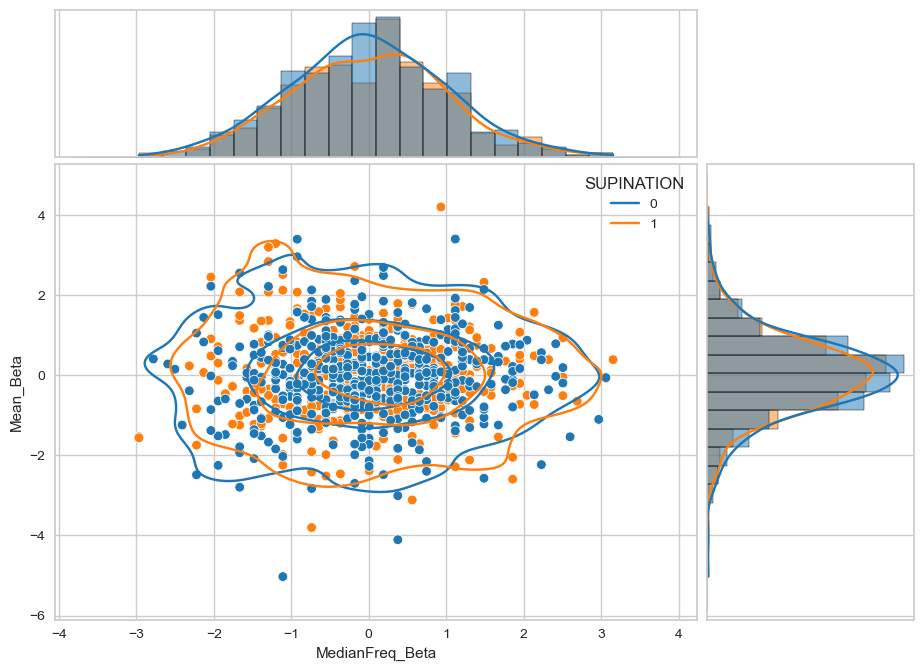

In [18]:
g = sns.jointplot(data=df_standardized, x="MedianFreq_Beta", y="Mean_Beta", hue="SUPINATION", ratio=3, space=0.05,palette=custom_colors)
g.plot_joint(sns.kdeplot, levels=4)
g.plot_marginals(sns.histplot, bins=20, kde=True)
sns.despine(top=False, right=False)
g.fig.set_figheight(7)
g.fig.set_figwidth(10)

The scatter plot with KDE contours suggests a specific relationship and clustering between these variables. The marginal histograms show the distribution of each variable, which appears to be approximately normal.

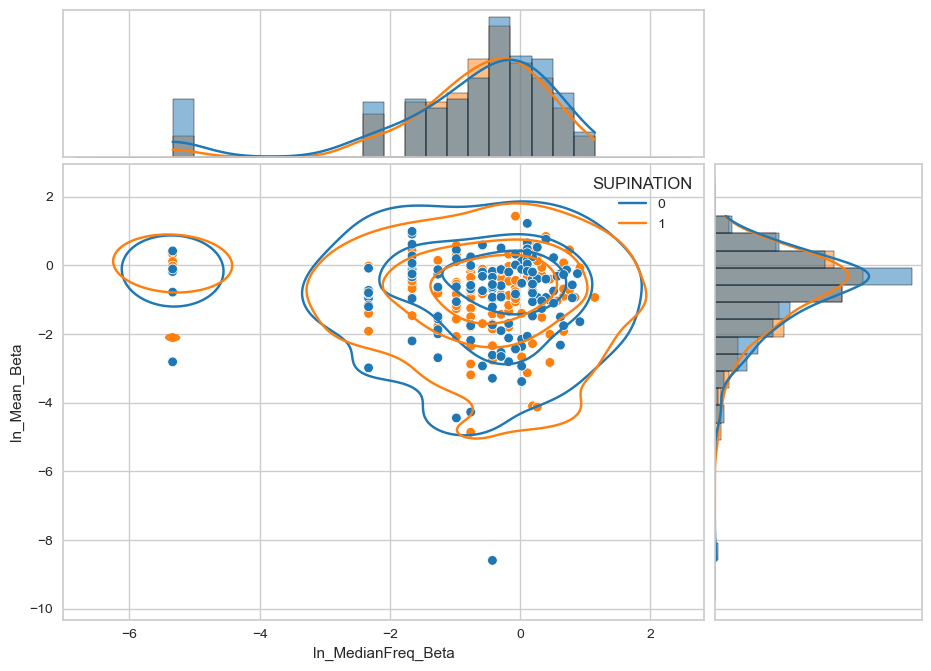

In [19]:
df_standardized['ln_MedianFreq_Beta'] = np.log(df_standardized['MedianFreq_Beta'])
df_standardized['ln_Mean_Beta'] = np.log(df_standardized['Mean_Beta'])

g = sns.jointplot(data=df_standardized, x="ln_MedianFreq_Beta", y="ln_Mean_Beta", hue="SUPINATION", ratio=3, space=0.05,palette=custom_colors)
g.plot_joint(sns.kdeplot, levels=4)
g.plot_marginals(sns.histplot, bins=20, kde=True)
sns.despine(top=False, right=False)
g.fig.set_figheight(7)
g.fig.set_figwidth(10)

The KDE contours and marginal histograms show the distribution and density of the log-transformed variables.

#### Given the results shown here, there is not a definitive feature or group of features that would allow for a definitive classification. Knowing this, the features extracted from this Case 1 are the ones that follow: 
- Mean_SCP
- Skew_SCP
- MeanFreq_SCP
- PetrosianFD_Mu
- MedianFreq_Beta
- Mean_Beta


## CASE 2: Features extracted after advanced preprocessing: xDAWN

In the second scenario, the xDAWN spatial filtering method was applied before feature extraction.

The xDAWN algorithm is a spatial filtering method used in EEG signal processing, specifically designed to enhance event-related potentials (ERPs) and other task-related brain activity, such as Slow Cortical Potential (SCP), while suppressing noise and artifacts.

xDAWN is applied in the following way:

1. **Artifact removal**: Data has been cleaned by removing artifacts with basic preprocessing explained in case 1.
2. **Segmentation**: Secondly, continuous EEG data has been segmented into trials, each corresponding to a specific event such as supination, close hand movement, and rest. This segmentation allows us to capture the neural responses related to these specific actions and include periods of rest to account for possible noise in the data.
3. **Labeling the trials**:  A vector of labels has been created to distinguish between the event-related trials (supination and close hand movements) and the rest trials. The labels were defined as 1 for the event-related trials and 2 for the rest trials.
4. **Initializing and training xDAWN filter**: We initialized the xDAWN filter object with the segmented data, specifying the number of components and the target class label.
5. **Constructing the Spatial Filter**: We trained the spatial filter using the segmented data from run 1 from all subjects to obtain the spatially filtered signal and the spatial filter weights.
6. **Filter data**: We filtered data from run 2 to 10 from all subjects in order to extract the features posteriorly. By applying the spatial filter obtained from the xDAWN training step to the remaining runs, we ensured consistent preprocessing across the dataset.

This approach allowed us to take into account spatio-temporal features, enhancing the detection of SCPs (Slow Cortical Potentials) by focusing on both the spatial distribution and temporal evolution of the neural responses.

*xDAWN references:*

- [xDAWN_filter/xDAWN_class.m · SJTUBBL-BCILab/xDAWN_filter. (n.d.). GitHub](https://https://github.com/SJTUBBL-BCILab/xDAWN_filter/blob/main/xDAWN_class.m)
- [xDAWN algorithm to enhance evoked potentials: Application to brain-computer interface—PubMed. (n.d.)](https://pubmed.ncbi.nlm.nih.gov/19174332/)

#### Load the data

In [20]:
# Read the data
data_xDAWN = pd.read_csv("features_xDAWN.csv", delimiter = ',')

# Clean the column names by replacing non-breaking spaces with regular spaces
data_xDAWN.columns = data_xDAWN.columns.str.replace('\xa0', ' ')

# Visualize the information of the dataset
data_xDAWN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PeakToPeak_SCP        260 non-null    float64
 1   Max_SCP               260 non-null    float64
 2   Mean_SCP              260 non-null    float64
 3   Var_SCP               260 non-null    float64
 4   Std_SCP               260 non-null    float64
 5   Skew_SCP              260 non-null    float64
 6   Kurt_SCP              260 non-null    float64
 7   HiguchiFD_SCP         260 non-null    float64
 8   PetrosianFD_SCP       260 non-null    float64
 9   MeanFreq_SCP          260 non-null    float64
 10  MedianFreq_SCP        260 non-null    float64
 11  RMS_SCP               260 non-null    float64
 12  spectralEntropy_SCP   260 non-null    float64
 13  PeakToPeak_Mu         260 non-null    float64
 14  Max_Mu                260 non-null    float64
 15  Mean_Mu               2

To be sure that we are working with numbers and not strings, a conversion is done to allow the classifiers and clustering methods to understand the data.

In [21]:
# Convert columns to numeric
for column in data_xDAWN.columns:
    data_xDAWN[column] = pd.to_numeric(data_xDAWN[column], errors='coerce')

In [22]:
data_xDAWN.describe()

PeakToPeak_SCP     Max_SCP    Mean_SCP     Var_SCP     Std_SCP  \
count      260.000000  260.000000  260.000000  260.000000  260.000000   
mean         0.013684    0.006993    0.000009    0.000006    0.002475   
std          0.002816    0.001716    0.000111    0.000002    0.000440   
min          0.008222    0.004189   -0.000304    0.000002    0.001499   
25%          0.011785    0.005786   -0.000061    0.000005    0.002194   
50%          0.013281    0.006674    0.000005    0.000006    0.002413   
75%          0.015215    0.007882    0.000077    0.000007    0.002720   
max          0.028264    0.015518    0.000654    0.000021    0.004579   

         Skew_SCP    Kurt_SCP  HiguchiFD_SCP  PetrosianFD_SCP  MeanFreq_SCP  \
count  260.000000  260.000000     260.000000       260.000000    260.000000   
mean     0.073258    3.086003       0.040113         0.026809     -0.014047   
std      0.289198    0.577840       0.009002         0.011921      0.002017   
min     -0.906702    2.132377       0.018377         0.009204     -0.020570   
25%     -0.130081    2.717438       0.033797         0.018408     -0.015408   
50%      0.075487    2.950560       0.038700         0.024544     -0.014036   
75%      0.268164    3.334495       0.045674         0.032214     -0.012613   
max      0.969780    6.373864       0.073553         0.092039     -0.009415   

       ...   Kurt_Beta  HiguchiFD_Beta  PetrosianFD_Beta  MeanFreq_Beta  \
count  ...  260.000000      260.000000        260.000000     260.000000   
mean   ...    3.667037        0.258843          0.254039      -0.139090   
std    ...    0.838845        0.007364          0.012038       0.007463   
min    ...    2.629020        0.239951          0.225495      -0.164904   
25%    ...    3.082498        0.254320          0.246971      -0.143142   
50%    ...    3.415302        0.258332          0.254641      -0.138109   
75%    ...    4.028289        0.262479          0.260777      -0.134292   
max    ...    9.297328        0.281753          0.296058      -0.121564   

       MedianFreq_Beta    RMS_Beta  Bandpower_Beta  freqPeakPSD_Beta  \
count       260.000000  260.000000      260.000000        260.000000   
mean          1.004288    1.518289        2.496612          0.243590   
std           0.000110    0.438347        1.407276          0.040391   
min           1.004057    0.773375        0.598109          0.174874   
25%           1.004217    1.114917        1.243039          0.211689   
50%           1.004286    1.571743        2.470382          0.236233   
75%           1.004354    1.827166        3.338538          0.270364   
max           1.004674    2.845248        8.095435          0.342078   

       spectralEntropy_Beta  SUPINATION  
count            260.000000  260.000000  
mean               6.435739    0.465385  
std                0.109519    0.499762  
min                6.052344    0.000000  
25%                6.360228    0.000000  
50%                6.438329    0.000000  
75%                6.503974    1.000000  
max                6.736351    1.000000  

[8 rows x 44 columns]

**Null values analysis**

To be 100% sure that there are no Nan values a further analysis has been performed. A null extraction has been performed on the Matlab code but this is a standard analysis that has to be done in order to be sure that there are no null values along all the data. 

In [23]:
data_xDAWN.isnull().sum()

PeakToPeak_SCP          0
Max_SCP                 0
Mean_SCP                0
Var_SCP                 0
Std_SCP                 0
Skew_SCP                0
Kurt_SCP                0
HiguchiFD_SCP           0
PetrosianFD_SCP         0
MeanFreq_SCP            0
MedianFreq_SCP          0
RMS_SCP                 0
spectralEntropy_SCP     0
PeakToPeak_Mu           0
Max_Mu                  0
Mean_Mu                 0
Var_Mu                  0
Std_Mu                  0
Skew_Mu                 0
Kurt_Mu                 0
HiguchiFD_Mu            0
PetrosianFD_Mu          0
MeanFreq_Mu             0
MedianFreq_Mu           0
RMS_Mu                  0
Bandpower_Mu            0
freqPeakPSD_Mu          0
spectralEntropy_Mu      0
PeakToPeak_Beta         0
Max_Beta                0
Mean_Beta               0
Var_Beta                0
Std_Beta                0
Skew_Beta               0
Kurt_Beta               0
HiguchiFD_Beta          0
PetrosianFD_Beta        0
MeanFreq_Beta           0
MedianFreq_B

As it is seen in the previous print, the previous elimination of Nan values done in the Matlab code has worked properly. So now that we have all the data loaded and without any NaN values, the exploratory data analysis can proceed.


**Outliers detection**

On this section,the outliers detection has been performed. It must be taken into account that all the data must be previously standarized in order to do the proper fitting. 

In [24]:
from sklearn.preprocessing import StandardScaler

# Separate the SUPINATION column
supination = data_xDAWN['SUPINATION']
features = data_xDAWN.drop(columns=['SUPINATION'])

# Standardize the features
scaler = StandardScaler()
features_standardized_xDAWN = scaler.fit_transform(features)

# Create a DataFrame for the standardized features
df_standardized_xDAWN = pd.DataFrame(features_standardized_xDAWN, columns=features.columns)

# Add the SUPINATION column back to the standardized DataFrame
df_standardized_xDAWN['SUPINATION'] = supination.reset_index(drop=True)

# Optionally display the standardized DataFrame
df_standardized_xDAWN.describe()

PeakToPeak_SCP       Max_SCP      Mean_SCP       Var_SCP       Std_SCP  \
count    2.600000e+02  2.600000e+02  2.600000e+02  2.600000e+02  2.600000e+02   
mean     2.732857e-17 -1.229786e-16 -6.832142e-18  4.099285e-17 -3.552714e-16   
std      1.001929e+00  1.001929e+00  1.001929e+00  1.001929e+00  1.001929e+00   
min     -1.943362e+00 -1.637581e+00 -2.833171e+00 -1.695478e+00 -2.223957e+00   
25%     -6.754914e-01 -7.050864e-01 -6.362343e-01 -6.261804e-01 -6.397471e-01   
50%     -1.435099e-01 -1.864313e-01 -4.298714e-02 -2.059493e-01 -1.407131e-01   
75%      5.448892e-01  5.187604e-01  6.132045e-01  4.502342e-01  5.586504e-01   
max      5.187547e+00  4.977686e+00  5.836136e+00  6.098522e+00  4.792532e+00   

           Skew_SCP      Kurt_SCP  HiguchiFD_SCP  PetrosianFD_SCP  \
count  2.600000e+02  2.600000e+02   2.600000e+02     2.600000e+02   
mean   3.074464e-17  1.537232e-17   1.844678e-16    -1.127303e-16   
std    1.001929e+00  1.001929e+00   1.001929e+00     1.001929e+00   
min   -3.395083e+00 -1.653512e+00  -2.419152e+00    -1.479728e+00   
25%   -7.044692e-01 -6.390627e-01  -7.030200e-01    -7.061435e-01   
50%    7.722735e-03 -2.348467e-01  -1.573499e-01    -1.904207e-01   
75%    6.752535e-01  4.308663e-01   6.188765e-01     4.542328e-01   
max    3.106012e+00  5.700891e+00   3.721736e+00     5.482530e+00   

       MeanFreq_SCP  ...     Kurt_Beta  HiguchiFD_Beta  PetrosianFD_Beta  \
count  2.600000e+02  ...  2.600000e+02    2.600000e+02      2.600000e+02   
mean  -3.450232e-16  ... -6.490535e-17   -4.884981e-15     -2.427118e-15   
std    1.001929e+00  ...  1.001929e+00    1.001929e+00      1.001929e+00   
min   -3.240744e+00  ... -1.239823e+00   -2.570194e+00     -2.375741e+00   
25%   -6.763041e-01  ... -6.981814e-01   -6.153024e-01     -5.882880e-01   
50%    5.536304e-03  ... -3.006760e-01   -6.946601e-02      5.008796e-02   
75%    7.126594e-01  ...  4.314853e-01    4.947941e-01      5.607888e-01   
max    2.300963e+00  ...  6.724904e+00    3.117064e+00      3.497318e+00   

       MeanFreq_Beta  MedianFreq_Beta      RMS_Beta  Bandpower_Beta  \
count   2.600000e+02     2.600000e+02  2.600000e+02    2.600000e+02   
mean   -4.048044e-15    -1.272975e-12 -2.135044e-17    3.023223e-16   
std     1.001929e+00     1.001929e+00  1.001929e+00    1.001929e+00   
min    -3.465778e+00    -2.116672e+00 -1.702649e+00   -1.351664e+00   
25%    -5.441174e-01    -6.521742e-01 -9.219874e-01   -8.924975e-01   
50%     1.316069e-01    -2.498125e-02  1.221789e-01   -1.867445e-02   
75%     6.441089e-01     6.019428e-01  7.059984e-01    5.994207e-01   
max     2.352995e+00     3.524040e+00  3.033025e+00    3.986157e+00   

       freqPeakPSD_Beta  spectralEntropy_Beta  SUPINATION  
count      2.600000e+02          2.600000e+02  260.000000  
mean       1.844678e-16          2.637207e-15    0.465385  
std        1.001929e+00          1.001929e+00    0.499762  
min       -1.704581e+00         -3.507478e+00    0.000000  
25%       -7.913340e-01         -6.908159e-01    0.000000  
50%       -1.825030e-01          2.369307e-02    0.000000  
75%        6.641527e-01          6.242419e-01    1.000000  
max        2.443081e+00          2.750134e+00    1.000000  

[8 rows x 44 columns]

Once the data has been standarized, it's time to plot the outliers with the use of automatic tools such as DBSCAN or OPTICS that are two Density-based algorithms that are very good to detect automatically outliers. 

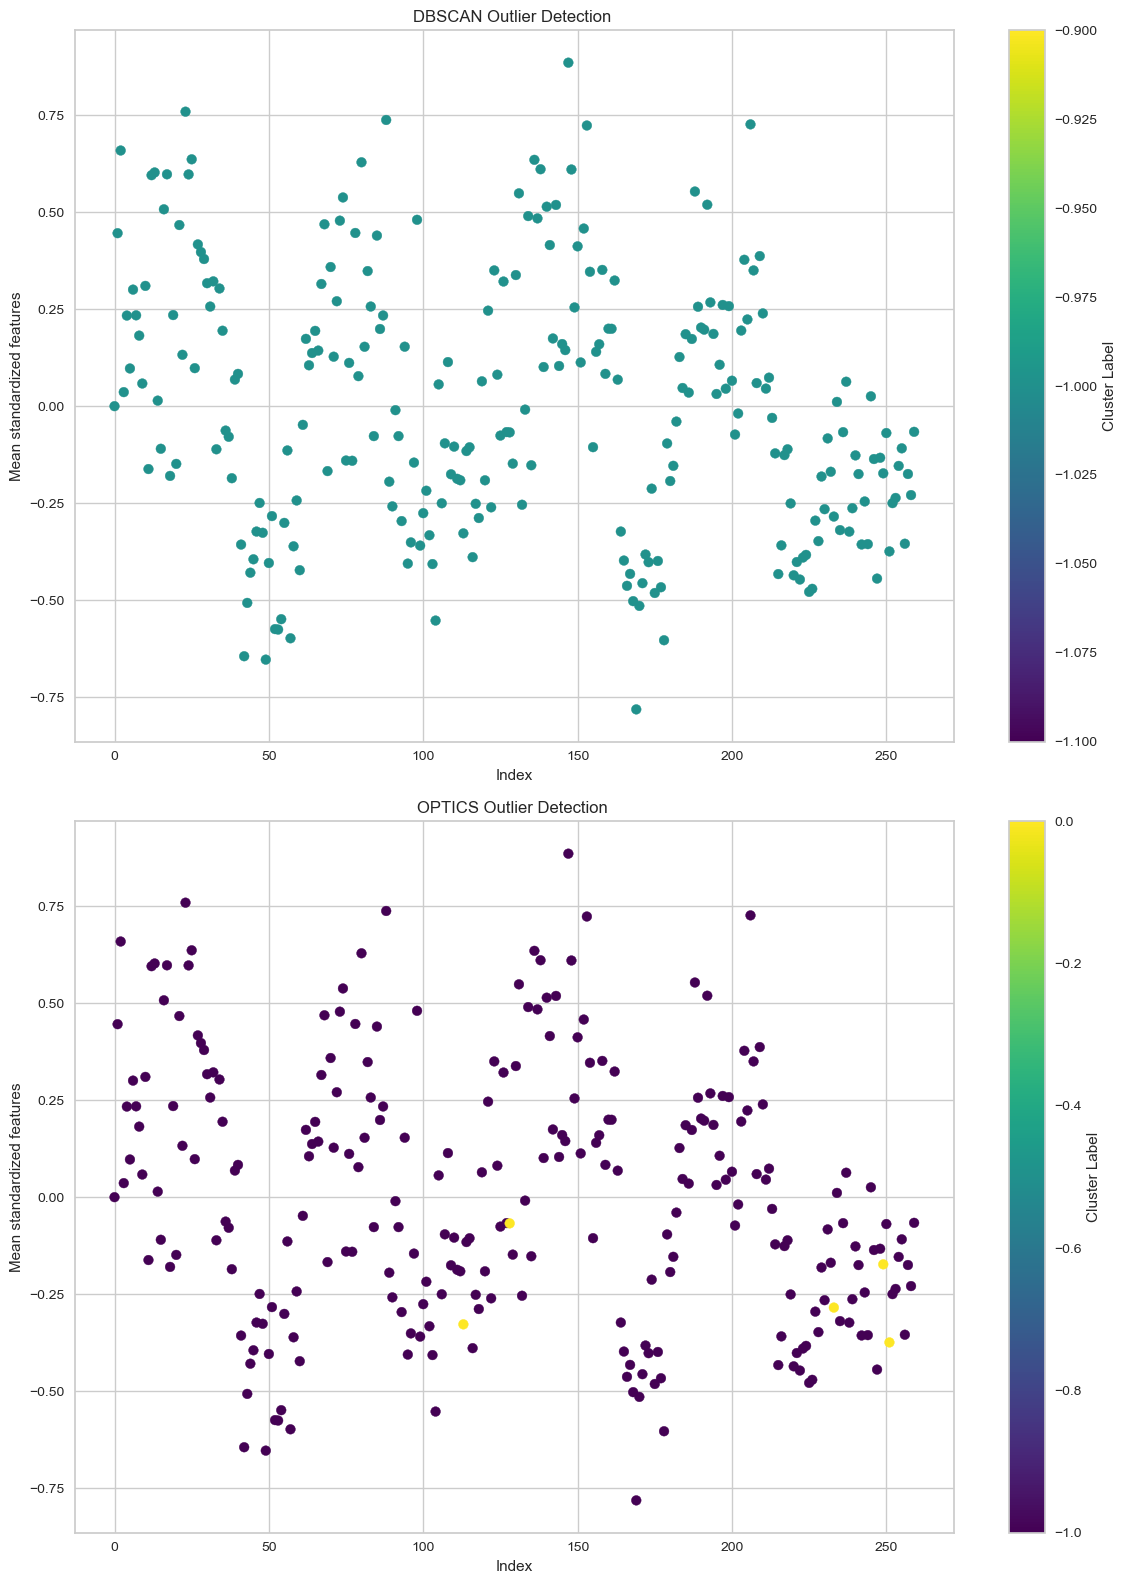

In [25]:
# Function to plot outliers
def outliers_plot(ax, features_df, outliers, model='', extra_feature=''):
    scatter = ax.scatter(range(len(features_df)), features_df.mean(axis=1), c=outliers, cmap='viridis')
    ax.set_xlabel('Index')
    ax.set_ylabel('Mean standardized features')
    ax.set_title(f'{model} Outlier Detection {extra_feature}')
    plt.colorbar(scatter, ax=ax, label='Cluster Label')

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features_standardized_xDAWN)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
outliers_dbscan = dbscan.fit_predict(features_imputed)

# Apply OPTICS clustering
optics = OPTICS(min_samples=5)
labels_optics = optics.fit_predict(features_imputed)

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 16))

# Visualization for DBSCAN
outliers_plot(axes[0], features_imputed, outliers_dbscan, 'DBSCAN')

# Visualization for OPTICS
outliers_plot(axes[1], features_imputed, labels_optics, 'OPTICS')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Extract outliers (data points labeled as -1 by OPTICS)
outliers_indices_optics = np.where(labels_optics == -1)[0]
outliers_optics = features_imputed[outliers_indices_optics]


Unlike in Case 1, neither the DBSCAN nor the OPTICS algorithm detected any outliers. Comparing the results of both cases reveals that the application of the xDAWN method effectively eliminated outliers that were present in Case 1. Previously, these outliers exhibited mean standardized feature values higher than 1. In the current case, all values fall within the range of -0.6 to 0.8.

There are many features to be analyzed, when performing the pairplot it lasts too much. To avoid this lines of code, the sns.displot() function can provide the same information for the two selected features that there's interest in visualize. 

In [26]:
# There are many different features and the pairplot takes a lot of time in order to appear on the screen. This information will be seen throught the correlation 
#matrix and the different plots performed to analyze the data. 

# pairplot 
# g = sns.pairplot(data, hue="SUPINATION")

To know what features are interesting to be visualized, the correlation matrix is a useful tool that will provide us with this information. 

**Correlation Matrix**

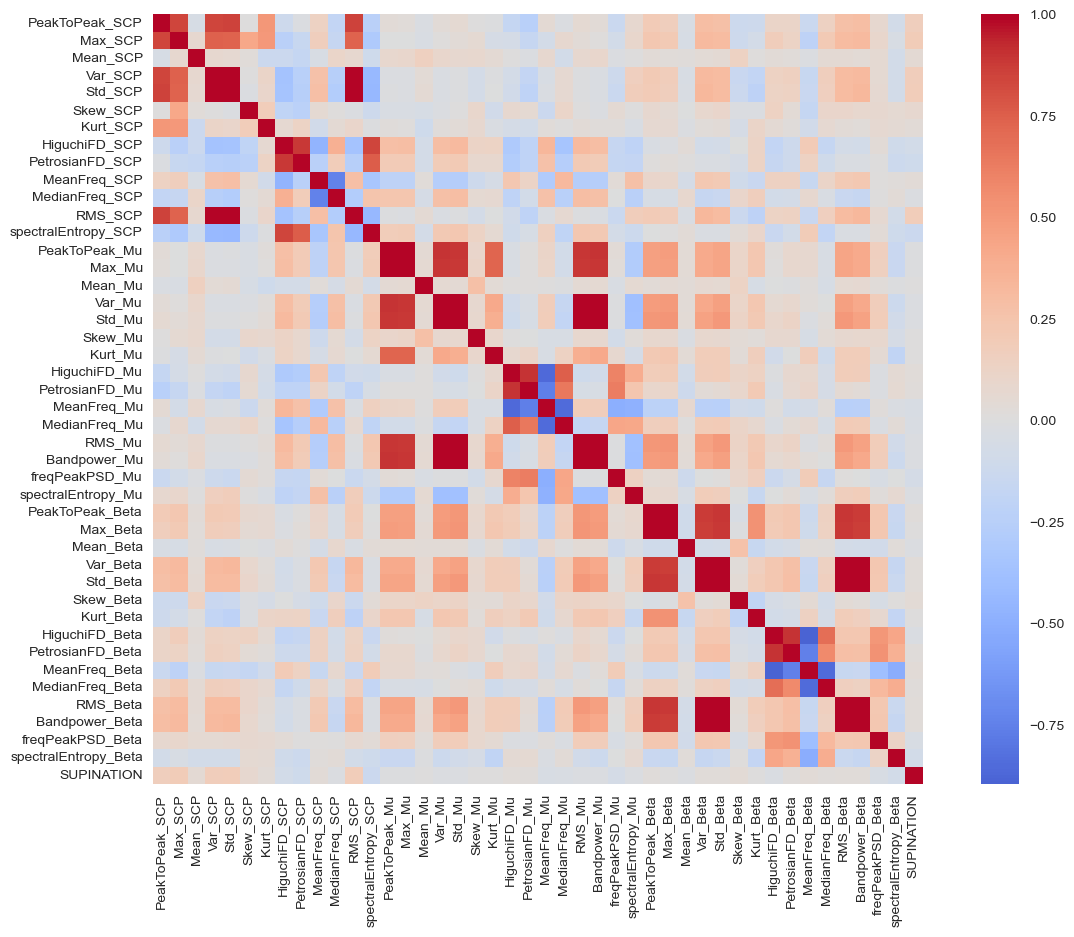

In [27]:
fig, ax = plt.subplots(figsize=(15, 10))  # Create a single axis
corrmat = df_standardized_xDAWN.corr(numeric_only=True)
sns.heatmap(corrmat, annot=False, square=True, cmap="coolwarm", center=0);

From this correlation matrix it can be seen that there are some features that are related with SUPINATION outcome. These features are:

- PeakToPeak_SCP
- Max_SCP
- Var_SCP
- Std_SCP
- HiguchiFD_SCP
- PetrosianFD_SCP
- MedianFreq_SCP
- RMS_SCP
- spectralEntropy_SCP
- PetrosianFD_Mu
- MedianFreq_Beta
- Mean_Beta
- spectralEntropy_Beta

Comparing this correlation matrix with that of Case 1, it is evident that SCP features have significantly improved. More of these features now exhibit stronger correlations with supination or similar hand movements.

To keep investigating on the dataset, some Histograms or Density plots can be performed with the desired features that have been previously selected thanks to the correlation matrix. 

In [28]:
# Define the features to plot
features = ['PeakToPeak_SCP','Max_SCP', 'Var_SCP', 'Std_SCP','HiguchiFD_SCP', 'PetrosianFD_SCP', 'MedianFreq_SCP', 'RMS_SCP', 'spectralEntropy_SCP', 'PetrosianFD_Mu', 'MedianFreq_Beta', 'Mean_Beta', 'spectralEntropy_Beta']

**Joint Histograms**

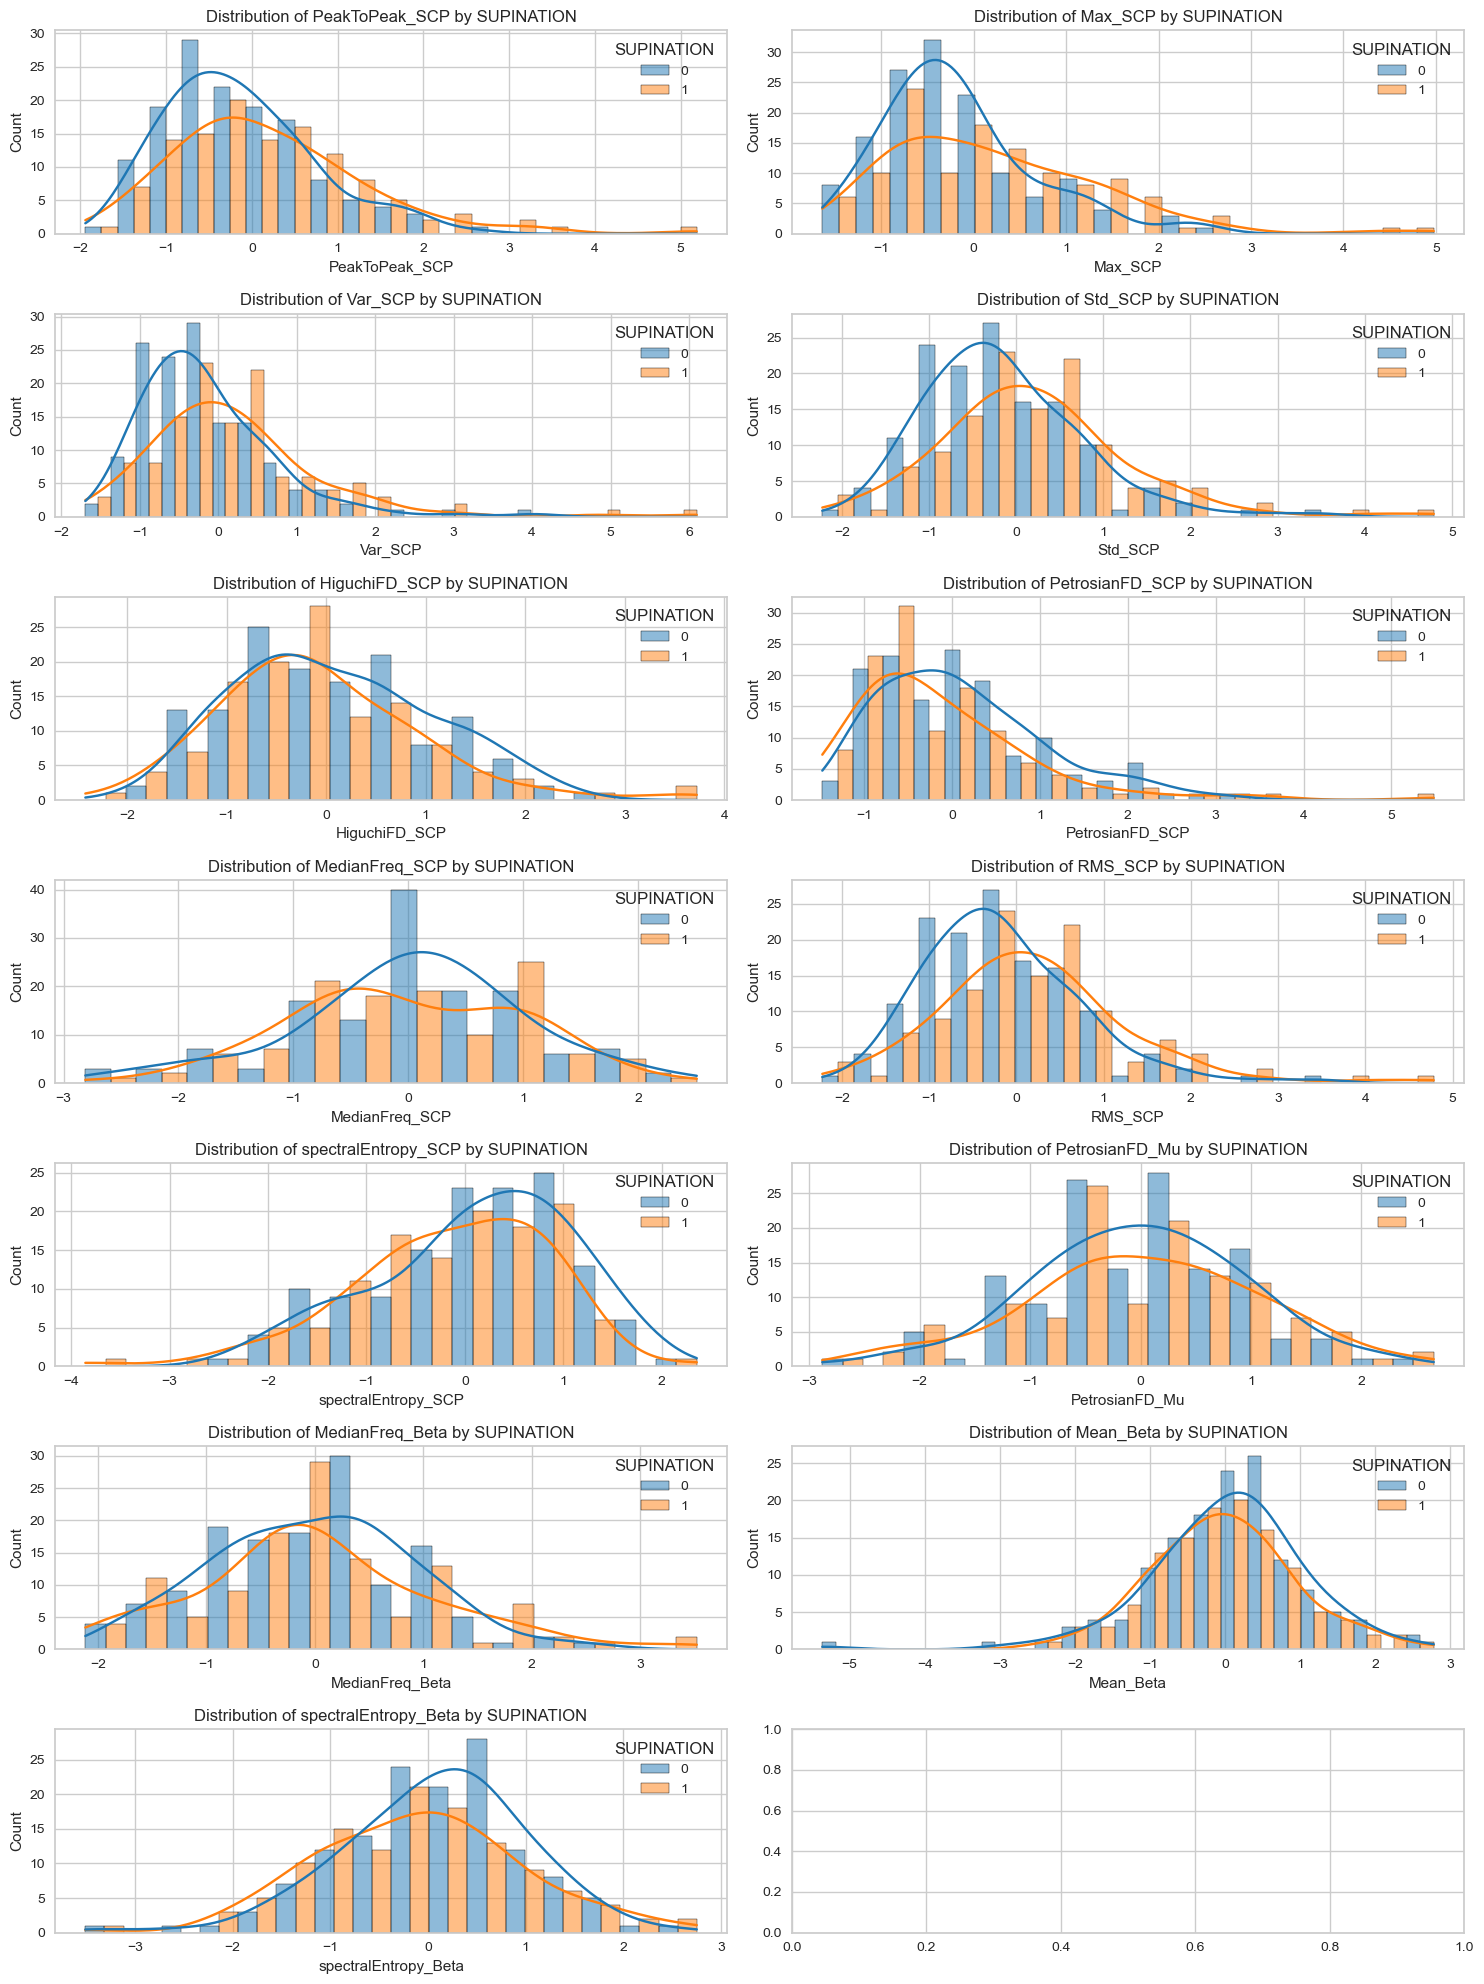

In [29]:
# Define a custom color palette
custom_colors = ['#1f77b4', '#ff7f0e']

# Create subplots
fig, axes = plt.subplots(7, 2, figsize=(15, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features):
    sns.histplot(data=df_standardized_xDAWN, x=feature, hue="SUPINATION", multiple="dodge", ax=axes[i], kde=True, palette=custom_colors)
    axes[i].set_title(f'Distribution of {feature} by SUPINATION')

# Adjust layout
plt.tight_layout()
plt.show()

**Density Plot**

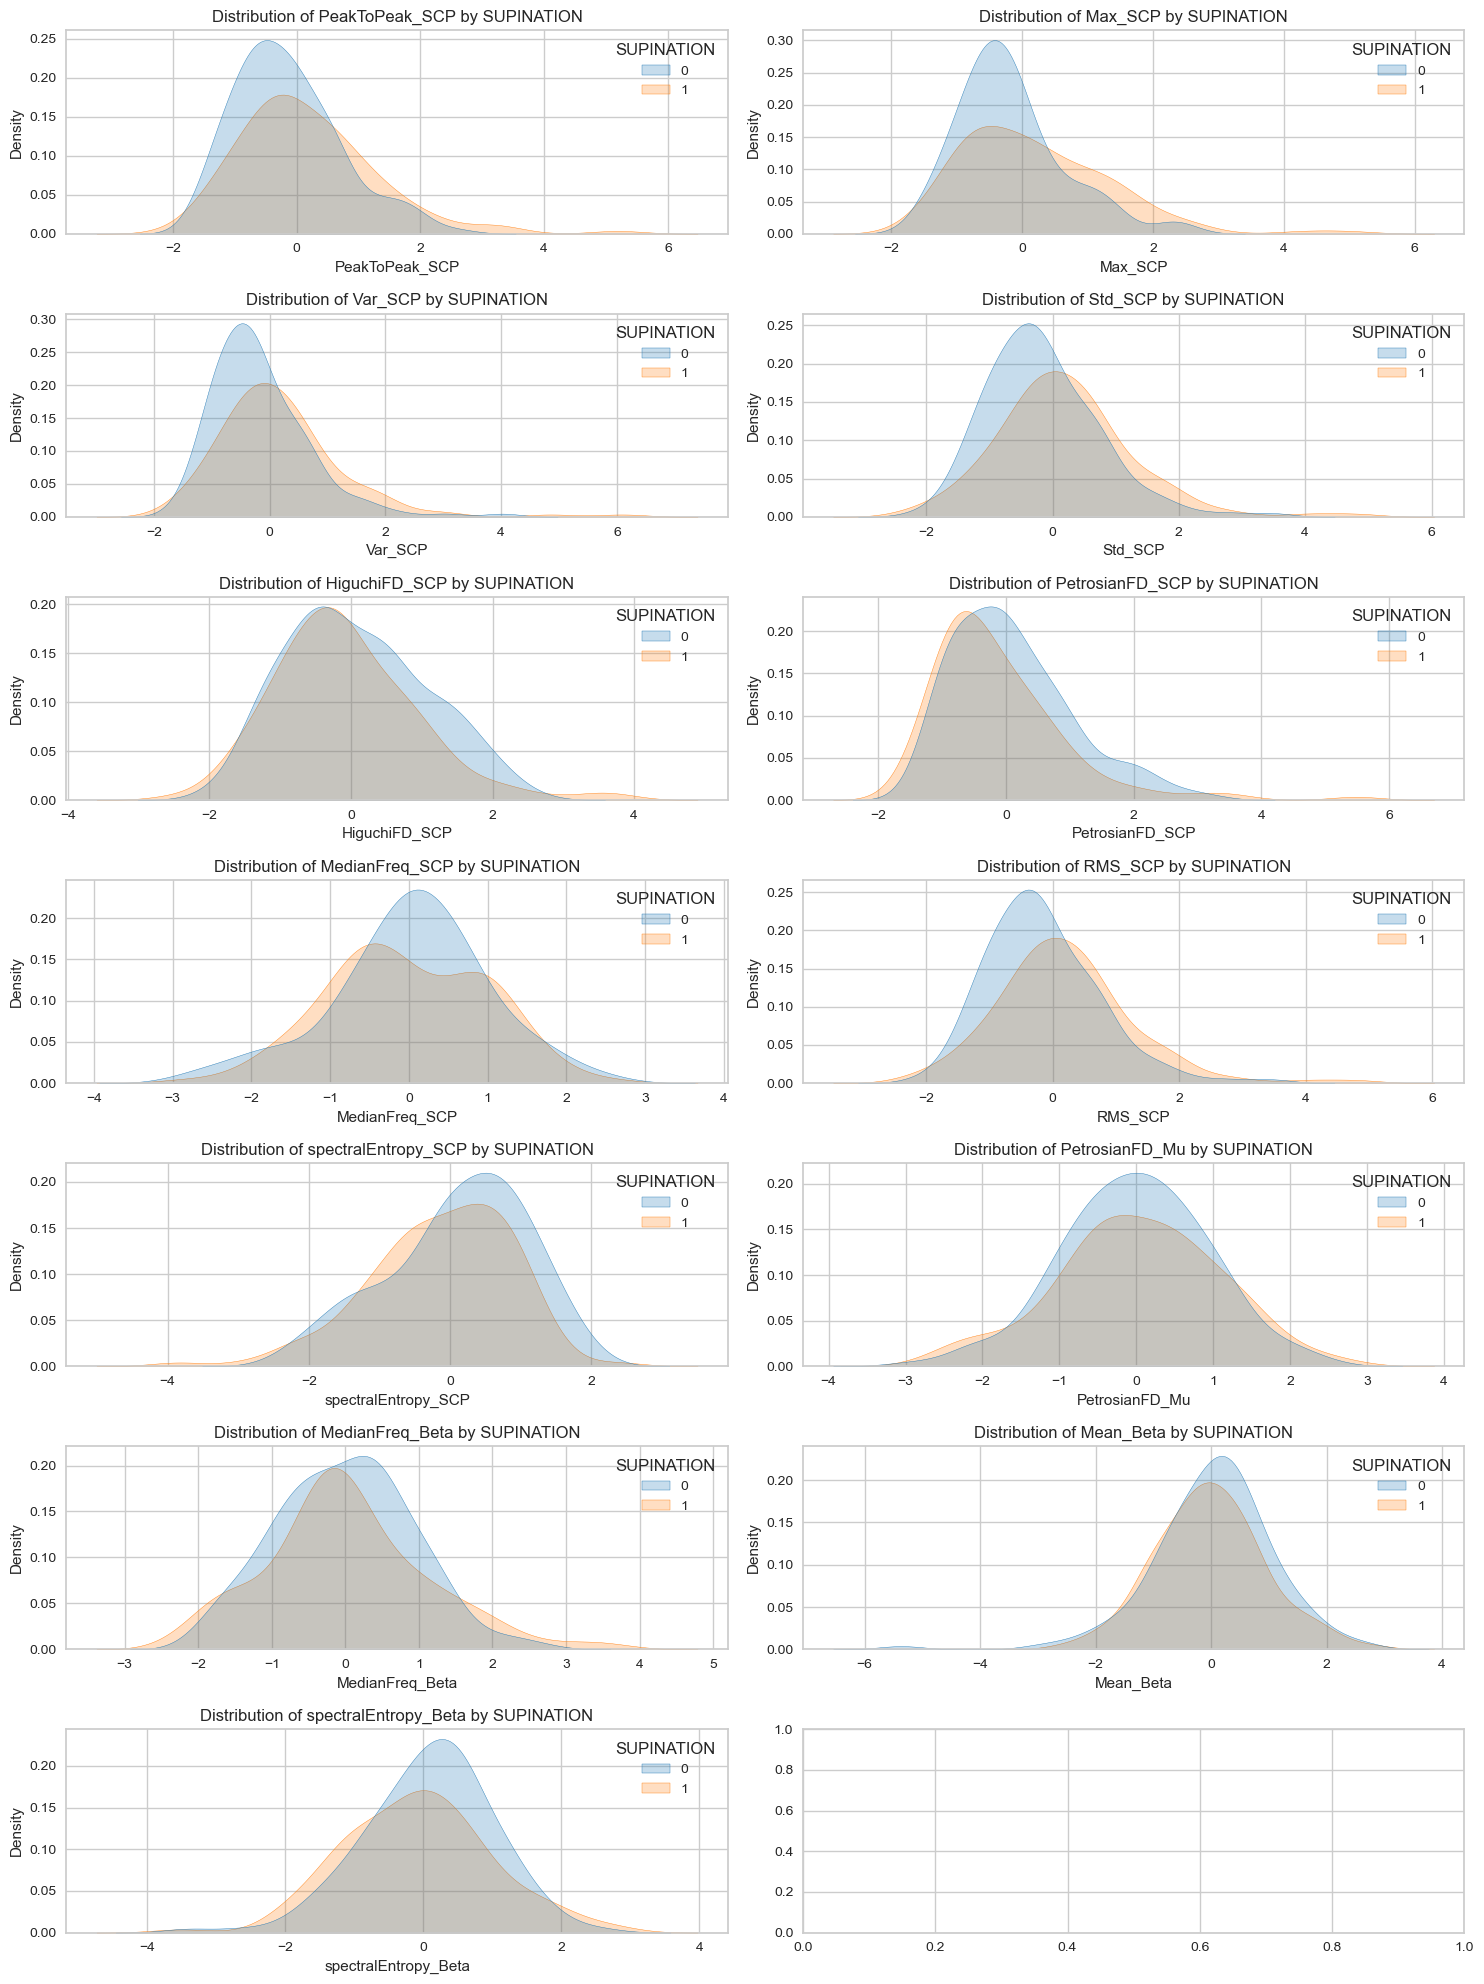

In [30]:
# Create subplots
fig, axes = plt.subplots(7, 2, figsize=(15, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features):
    sns.kdeplot(data=df_standardized_xDAWN, x=feature, hue="SUPINATION", fill=True, ax=axes[i],palette=custom_colors)
    axes[i].set_title(f'Distribution of {feature} by SUPINATION')

# Adjust layout
plt.tight_layout()
plt.show()

From the previous plots the following information can be extracted:

In [31]:
import pandas as pd
from IPython.display import display, Markdown

# Observations
info = {
    "Feature": [
        "PeakToPeak_SCP","Max_SCP", "Var_SCP", "Std_SCP","HiguchiFD_SCP", "PetrosianFD_SCP", "MedianFreq_SCP", "RMS_SCP", "spectralEntropy_SCP", "PetrosianFD_Mu", "MedianFreq_Beta", "Mean_Beta", "spectralEntropy_Beta"
    ],
    "Joint Histogram & Density Plots": [
        "The distribution for supination appears to have a slightly higher peak compared to the close hand condition, suggesting a higher frequency of values around the mean for supination. Both conditions show a similar range of values, indicating that the overall variability is consistent.",
        "Max_SCP shows a higher peak for supination, which could mean that the maximum SCP values are more common in the supination condition than in close hand. The spread of the distribution is comparable between the two conditions, suggesting similar dispersion.",
        "The ‘Var_SCP’ graph shows that both conditions have a similar shape and spread, indicating that the variance  does not differ significantly between supination and close hand.",
        "The standard deviation curves for both dates peak around 0 SCP, suggesting a consistent spread during movements. The significant overlap between the two curves indicates that the variability in SCP has remained stable",
        "The data appears to be symmetrically distributed around 0, suggesting that the Higuchi Fractal Dimension of SCP is centered at 0 for both conditions. The peaks of the histograms for both conditions are almost identical, indicating a similar central tendency.",
        "The Petrosian Fractal Dimension also shows a distribution centered at 0, with both conditions ‘0’ and ‘1’ having peaks at almost the same point on the x-axis.",
        "The Median Frequency of the count distribution is centered at 0, with the histogram bars and the fitted curve symmetrically distributed around this central value for both conditions. A significant difference is that close hand condition reaches higher values.",
        "The Root Mean Square (RMS) of the distribution for supination condition is centered at 0, whereas for close hand condition is a little bit displaced, it is placed between -1 and 0. The center of the distribution being between -1 and 0 suggests that the data points tend to be negative on average, with the distribution leaning more towards negative values than positive ones.",
        "Since both conditions achieve a similar shape and peak at the same points on the x-axis, it suggest that the spectral entropy distributions for both groups are similar. But, close hand peak is higher than supination one.",
        "The Petrosian Fractal Dimension (Mu) is centered at 0, suggesting a balanced distribution of values around the mean for both conditions, with a higher peak for close hand condition.",
        "Both groups show a similar distribution with a peak around 0. The distributions are quite symmetric and overlap significantly.",
        "The count distributions for both groups are centered around 0, with similar shapes. The histograms overlap significantly, showing no clear separation.",
        "The count distributions for both groups are similar, with a peak around 0. The histograms are slightly skewed but overlap significantly."
        
    ],
}

# Create a DataFrame
df = pd.DataFrame(info)

# Format the table as Markdown
markdown_table = """
| Feature | Joint Histogram & Density Plots |
|---------|---------------------------------|
"""
for i in range(len(df)):
    markdown_table += f"| {df['Feature'][i]} | {df['Joint Histogram & Density Plots'][i]} |\n"

# Display the Markdown table
display(Markdown(markdown_table))



| Feature | Joint Histogram & Density Plots |
|---------|---------------------------------|
| PeakToPeak_SCP | The distribution for supination appears to have a slightly higher peak compared to the close hand condition, suggesting a higher frequency of values around the mean for supination. Both conditions show a similar range of values, indicating that the overall variability is consistent. |
| Max_SCP | Max_SCP shows a higher peak for supination, which could mean that the maximum SCP values are more common in the supination condition than in close hand. The spread of the distribution is comparable between the two conditions, suggesting similar dispersion. |
| Var_SCP | The ‘Var_SCP’ graph shows that both conditions have a similar shape and spread, indicating that the variance  does not differ significantly between supination and close hand. |
| Std_SCP | The standard deviation curves for both dates peak around 0 SCP, suggesting a consistent spread during movements. The significant overlap between the two curves indicates that the variability in SCP has remained stable |
| HiguchiFD_SCP | The data appears to be symmetrically distributed around 0, suggesting that the Higuchi Fractal Dimension of SCP is centered at 0 for both conditions. The peaks of the histograms for both conditions are almost identical, indicating a similar central tendency. |
| PetrosianFD_SCP | The Petrosian Fractal Dimension also shows a distribution centered at 0, with both conditions ‘0’ and ‘1’ having peaks at almost the same point on the x-axis. |
| MedianFreq_SCP | The Median Frequency of the count distribution is centered at 0, with the histogram bars and the fitted curve symmetrically distributed around this central value for both conditions. A significant difference is that close hand condition reaches higher values. |
| RMS_SCP | The Root Mean Square (RMS) of the distribution for supination condition is centered at 0, whereas for close hand condition is a little bit displaced, it is placed between -1 and 0. The center of the distribution being between -1 and 0 suggests that the data points tend to be negative on average, with the distribution leaning more towards negative values than positive ones. |
| spectralEntropy_SCP | Since both conditions achieve a similar shape and peak at the same points on the x-axis, it suggest that the spectral entropy distributions for both groups are similar. But, close hand peak is higher than supination one. |
| PetrosianFD_Mu | The Petrosian Fractal Dimension (Mu) is centered at 0, suggesting a balanced distribution of values around the mean for both conditions, with a higher peak for close hand condition. |
| MedianFreq_Beta | Both groups show a similar distribution with a peak around 0. The distributions are quite symmetric and overlap significantly. |
| Mean_Beta | The count distributions for both groups are centered around 0, with similar shapes. The histograms overlap significantly, showing no clear separation. |
| spectralEntropy_Beta | The count distributions for both groups are similar, with a peak around 0. The histograms are slightly skewed but overlap significantly. |


From this analysis, it can be extracted that almost all features don't show a significant different between both conditions.

From the information earned by the last plots and the correlation matrix, some further investigation has been performed for the interesting features and the logarithm of them, to see if the results where better. 

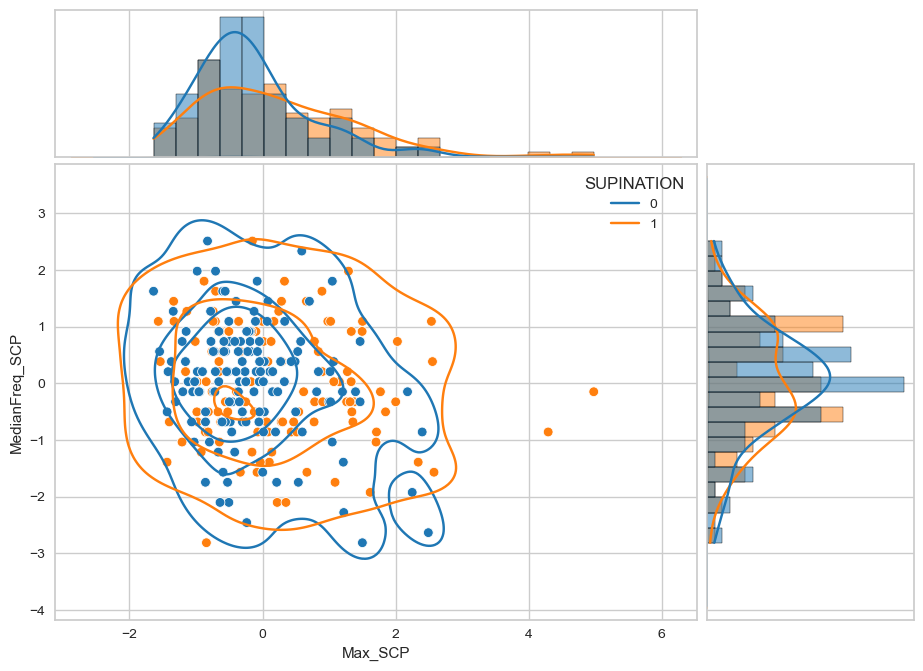

In [32]:
# Create the joint plot with a more visible color palette
g = sns.jointplot(data=df_standardized_xDAWN, x="Max_SCP", y="MedianFreq_SCP", hue="SUPINATION", ratio=3, space=0.05,palette=custom_colors)
g.plot_joint(sns.kdeplot, levels=4)
g.plot_marginals(sns.histplot, bins=20, kde=True)
sns.despine(top=False, right=False)
g.fig.set_figheight(7)
g.fig.set_figwidth(10)
plt.show()

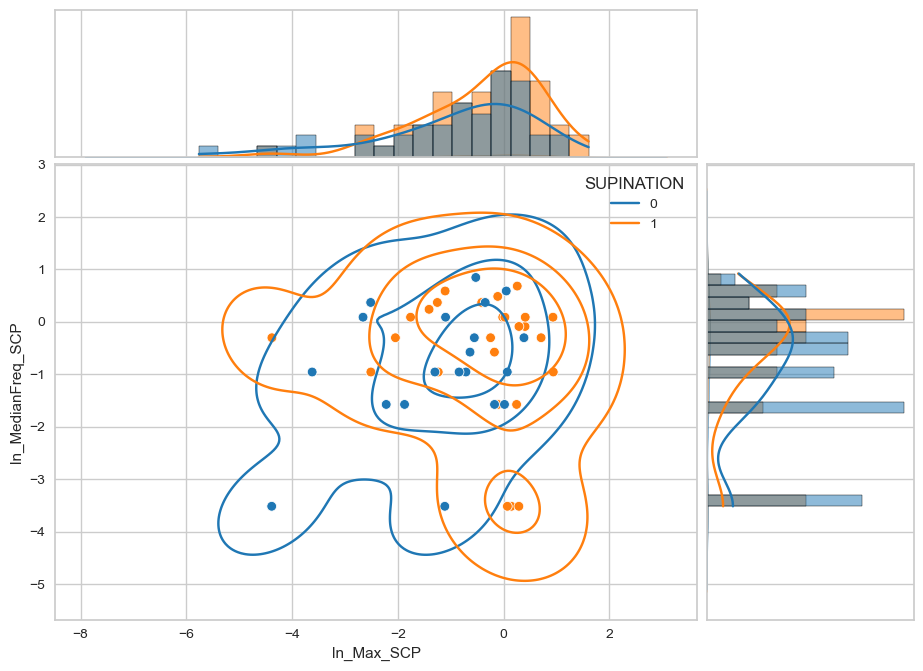

In [33]:
df_standardized_xDAWN['ln_Max_SCP'] = np.log(df_standardized_xDAWN['Max_SCP'])
df_standardized_xDAWN['ln_MedianFreq_SCP'] = np.log(df_standardized_xDAWN['MedianFreq_SCP'])


g = sns.jointplot(data=df_standardized_xDAWN, x="ln_Max_SCP", y="ln_MedianFreq_SCP", hue="SUPINATION", ratio=3, space=0.05,palette=custom_colors)
g.plot_joint(sns.kdeplot, levels=4)
g.plot_marginals(sns.histplot, bins=20, kde=True)
sns.despine(top=False, right=False)
g.fig.set_figheight(7)
g.fig.set_figwidth(10)

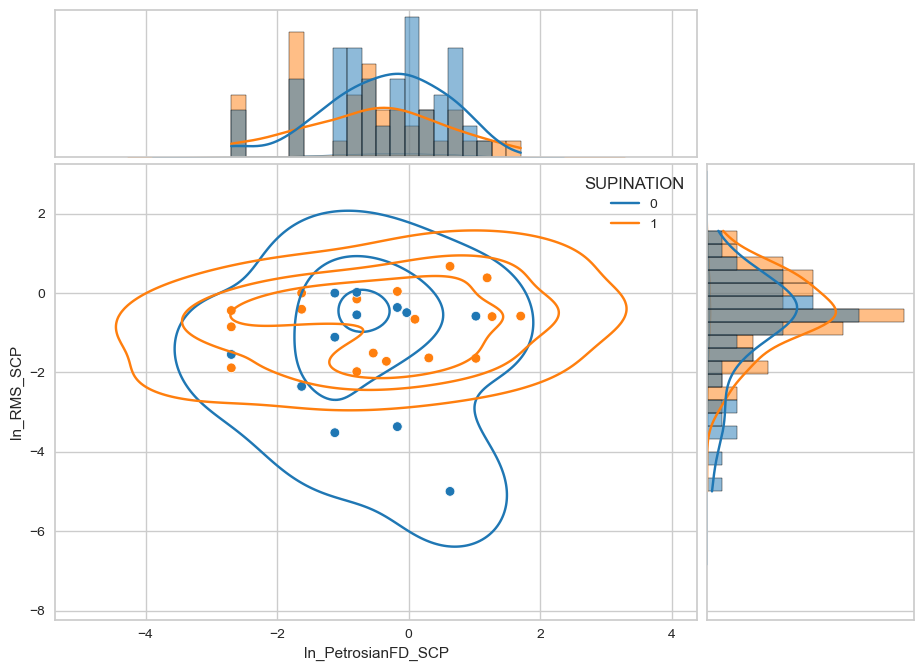

In [34]:
df_standardized_xDAWN['ln_RMS_SCP'] = np.log(df_standardized_xDAWN['RMS_SCP'])
df_standardized_xDAWN['ln_PetrosianFD_SCP'] = np.log(df_standardized_xDAWN['PetrosianFD_SCP'])


g = sns.jointplot(data=df_standardized_xDAWN, x="ln_PetrosianFD_SCP", y="ln_RMS_SCP", hue="SUPINATION", ratio=3, space=0.05,palette=custom_colors)
g.plot_joint(sns.kdeplot, levels=4)
g.plot_marginals(sns.histplot, bins=20, kde=True)
sns.despine(top=False, right=False)
g.fig.set_figheight(7)
g.fig.set_figwidth(10)

The contours show that the majority of the data points are clustered in a specific region, and the relationship between these variables is more evident after the transformation. The log transformation helps in stabilizing the variance and making the distribution more normal-like.

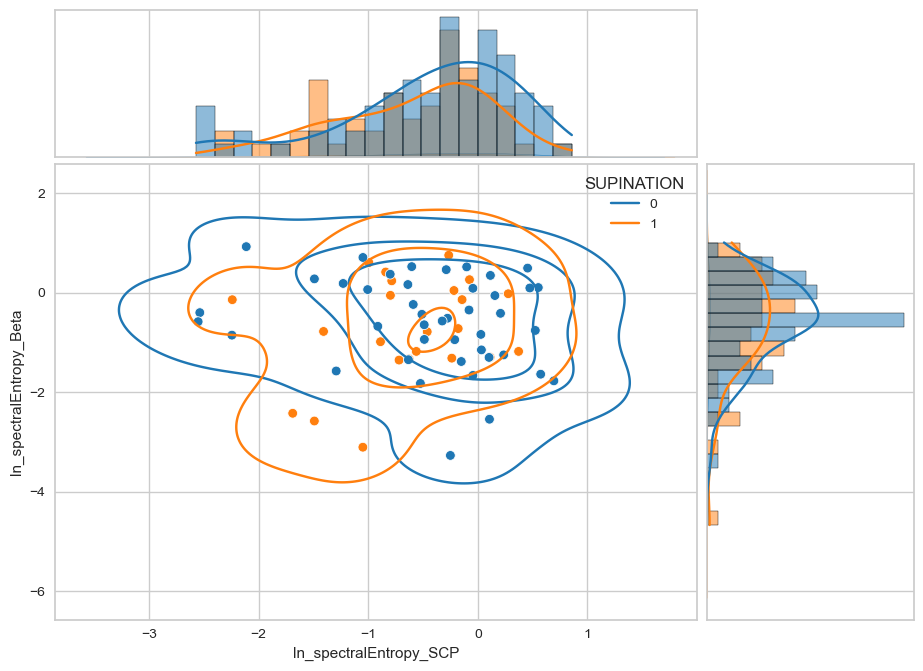

In [35]:
df_standardized_xDAWN['ln_spectralEntropy_SCP'] = np.log(df_standardized_xDAWN['spectralEntropy_SCP'])
df_standardized_xDAWN['ln_spectralEntropy_Beta'] = np.log(df_standardized_xDAWN['spectralEntropy_Beta'])

g = sns.jointplot(data=df_standardized_xDAWN, x="ln_spectralEntropy_SCP", y="ln_spectralEntropy_Beta", hue="SUPINATION", ratio=3, space=0.05,palette=custom_colors)
g.plot_joint(sns.kdeplot, levels=4)
g.plot_marginals(sns.histplot, bins=20, kde=True)
sns.despine(top=False, right=False)
g.fig.set_figheight(7)
g.fig.set_figwidth(10)

The log transformation reveals a clearer relationship and clustering pattern between the two variables.The KDE contours are more distinct, showing higher density regions.

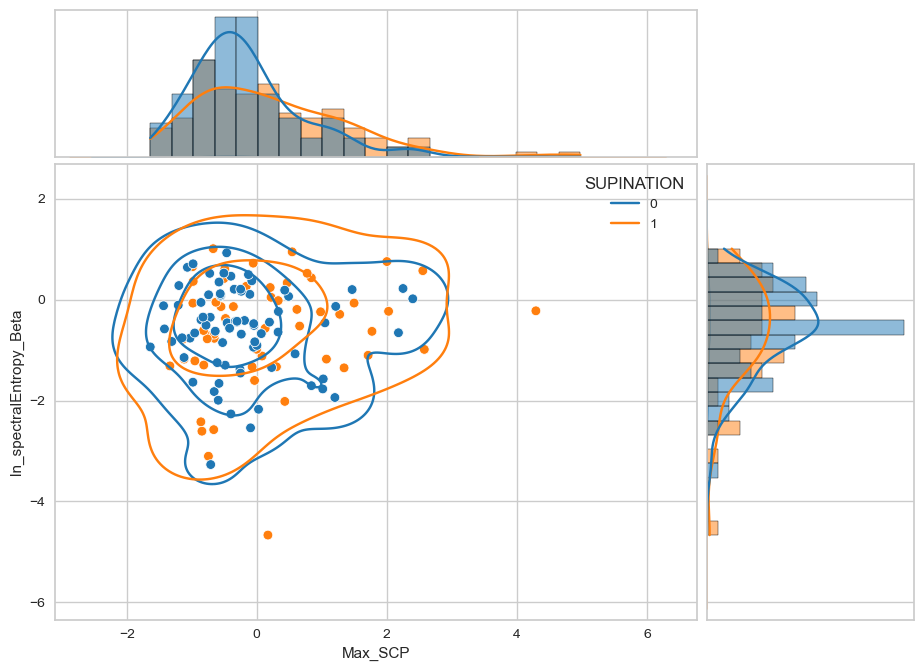

In [36]:
g = sns.jointplot(data=df_standardized_xDAWN, x="Max_SCP", y="ln_spectralEntropy_Beta", hue="SUPINATION", ratio=3, space=0.05,palette=custom_colors)
g.plot_joint(sns.kdeplot, levels=4)
g.plot_marginals(sns.histplot, bins=20, kde=True)
sns.despine(top=False, right=False)
g.fig.set_figheight(7)
g.fig.set_figwidth(10)

Although computing a logarithm in some features enhances som differencies between classes, also causes a loss in information. Thus, for case 2, we decided to follow our analysis with the following features:
- Max_SCP
- Var_SCP
- RMS_SCP
- HiguchiFD_SCP
- PetrosianFD_SCP
- spectralEntropy_Beta

## CASE 3: Features extracted after advanced preprocessing: Common Spatial Patterns (CSP)

In the third scenario, the Common Spatial Patterns (CSP) method was applied before feature extraction. CSP maximizes the variance between two classes of signals, enhancing discriminative SCP components.

#### Load the data

In [37]:
# Read the data
data = pd.read_csv("movement_new.csv", delimiter = ',')

# Clean the column names by replacing non-breaking spaces with regular spaces
data.columns = data.columns.str.replace('\xa0', ' ')

# Visualize the information of the dataset
data.info()

FileNotFoundError: [Errno 2] No such file or directory: 'movement_new.csv'

To be sure that we are working with numbers and not strings, a conversion is done to allow the classifiers and clustering methods to understand the data.

In [ ]:
# Convert columns to numeric
columns_to_convert = ['PeakToPeak_SCP','Max_SCP','Mean_SCP','Var_SCP','Std_SCP','Skew_SCP','Kurt_SCP','HiguchiFD_SCP','PetrosianFD_SCP','MeanFreq_SCP','MedianFreq_SCP','RMS_SCP','PeakToPeak_Mu','Max_Mu','Mean_Mu','Var_Mu','Std_Mu','Skew_Mu','Kurt_Mu','HiguchiFD_Mu','PetrosianFD_Mu','MeanFreq_Mu','MedianFreq_Mu','RMS_Mu','Bandpower_Mu','PeakToPeak_Beta','Max_Beta','Mean_Beta','Var_Beta','Std_Beta','Skew_Beta','Kurt_Beta','HiguchiFD_Beta','PetrosianFD_Beta','MeanFreq_Beta','MedianFreq_Beta','RMS_Beta','Bandpower_Beta','SUPINATION']

for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce')

In [ ]:
data.describe()

***Null values analysis***

To be 100% sure that there are no Nan values a further analysis has been performed. A null extraction has been performed on the Matlab code but this is a standard analysis that has to be done in order to be sure that there are no null values along all the data. 

In [ ]:
data.isnull().sum()

As it is seen in the previous print, the previous elimination of Nan values done in the Matlab code has worked properly. So now that we have all the data loaded and without any NaN values, the exploratory data analysis can proceed.


**Outliers detection**

On this section,the outliers detection has been performed. It must be taken into account that all the data must be previously standarized in order to do the proper fitting. 

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
columns_to_standardize = ['PeakToPeak_SCP','Max_SCP','Mean_SCP','Var_SCP','Std_SCP','Skew_SCP','Kurt_SCP','HiguchiFD_SCP','PetrosianFD_SCP','MeanFreq_SCP','MedianFreq_SCP','RMS_SCP','PeakToPeak_Mu','Max_Mu','Mean_Mu','Var_Mu','Std_Mu','Skew_Mu','Kurt_Mu','HiguchiFD_Mu','PetrosianFD_Mu','MeanFreq_Mu','MedianFreq_Mu','RMS_Mu','Bandpower_Mu','PeakToPeak_Beta','Max_Beta','Mean_Beta','Var_Beta','Std_Beta','Skew_Beta','Kurt_Beta','HiguchiFD_Beta','PetrosianFD_Beta','MeanFreq_Beta','MedianFreq_Beta','RMS_Beta','Bandpower_Beta','SUPINATION']
data_to_standardize = df_data_filled[columns_to_standardize]

scaler = StandardScaler()
features_standardized = scaler.fit_transform(data_to_standardize)

Once the data has been standarized, it's time to plot the outliers with the use of automatic tools such as DBSCAN or OPTICS that are two Density-based algorithms that are very good to detect automatically outliers. 

In [ ]:
# Function to plot outliers
def outliers_plot(ax, features_df, outliers, model='', extra_feature=''):
    scatter = ax.scatter(range(len(features_df)), features_df.mean(axis=1), c=outliers, cmap='viridis')
    ax.set_xlabel('Index')
    ax.set_ylabel('Mean standardized features')
    ax.set_title(f'{model} Outlier Detection {extra_feature}')
    plt.colorbar(scatter, ax=ax, label='Cluster Label')

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features_standardized)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
outliers_dbscan = dbscan.fit_predict(features_imputed)

# Apply OPTICS clustering
optics = OPTICS(min_samples=5)
labels_optics = optics.fit_predict(features_imputed)

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 16))

# Visualization for DBSCAN
outliers_plot(axes[0], features_imputed, outliers_dbscan, 'DBSCAN')

# Visualization for OPTICS
outliers_plot(axes[1], features_imputed, labels_optics, 'OPTICS')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Extract outliers (data points labeled as -1 by OPTICS)
outliers_indices_optics = np.where(labels_optics == -1)[0]
outliers_optics = features_imputed[outliers_indices_optics]


There are many features to be analyzed, when performing the pairplot it lasts too much. To avoid this lines of code, the sns.displot() function can provide the same information for the two selected features that there's interest in visualize. 

In [ ]:
# There are many different features and the pairplot takes a lot of time in order to appear on the screen. This information will be seen throught the correlation 
#matrix and the different plots performed to analyze the data. 

# pairplot 
# g = sns.pairplot(data, hue="SUPINATION")

To know what features are interesting to be visualized, the correlation matrix is a useful tool that will provide us with this information. 

**Correlation Matrix**

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))  # Create a single axis
corrmat = df_data_filled.corr(numeric_only=True)
sns.heatmap(corrmat, annot=False, square=True, cmap="coolwarm", center=0);

From this correlation matrix it can be seen that there are some features that are related with SUPINATION outcome. These features are:

-
-
-

To keep investigating on the dataset, some Histograms or Density plots can be performed with the desired features that have been previously selected thanks to the correlation matrix. 

**Joint Histograms**

In [ ]:
# HERE WE SHOULD CHOOSE THE DATA THAT WE ARE INTERESTED IN VISUALIZING, CURRENTLY IS PLACED WITH THE SCP_1 (PEAK TO PEAK VALUE)!!! 

sns.displot(df_data_filled, x="spectralEntropy_SCP",hue="SUPINATION", multiple="dodge",
            facet_kws={'despine': False});



**Density Plot**

In [ ]:
# HERE WE SHOULD CHOOSE THE DATA THAT WE ARE INTERESTED IN VISUALIZING, CURRENTLY IS PLACED WITH THE SCP_1 (PEAK TO PEAK VALUE)!!! 

sns.displot(df_data_filled, x="MeanFreq_SCP", hue="SUPINATION", kind="kde",
            fill=True, facet_kws={'despine': False});

From the information earned by the last plots and the correlation matrix, some further investigation has been performed for the interesting features and the logarithm of them, to see if the results where better. 

In [ ]:
g = sns.jointplot(data=df_data_filled, x="Kurt_Mu", y="Skew_SCP", hue="SUPINATION", ratio=3, space=0.05)
g.plot_joint(sns.kdeplot, levels=4)
g.plot_marginals(sns.histplot, bins=20, kde=True)
sns.despine(top=False, right=False)
g.fig.set_figheight(7)
g.fig.set_figwidth(10)

In [ ]:
df_data_filled['ln_MeanFreq_SCP'] = np.log(df_data_filled['MeanFreq_SCP'])
df_data_filled['ln_MedianFreq_SCP'] = np.log(df_data_filled['MedianFreq_SCP'])


g = sns.jointplot(data=df_data_filled, x="ln_MeanFreq_SCP", y="ln_MedianFreq_SCP", hue="SUPINATION", ratio=3, space=0.05)
g.plot_joint(sns.kdeplot, levels=4)
g.plot_marginals(sns.histplot, bins=20, kde=True)
sns.despine(top=False, right=False)
g.fig.set_figheight(7)
g.fig.set_figwidth(10)

In [ ]:
g = sns.jointplot(data=df_data_filled, x="PetrosianFD_SCP", y="BETA_2", hue="SUPINATION", ratio=3, space=0.05)
g.plot_joint(sns.kdeplot, levels=4)
g.plot_marginals(sns.histplot, bins=20, kde=True)
sns.despine(top=False, right=False)
g.fig.set_figheight(7)
g.fig.set_figwidth(10)

In [ ]:
df_data_filled['ln_PetrosianFD_SCP'] = np.log(df_data_filled['PetrosianFD_SCP'])
#df_data_filled['ln_SCP_1'] = np.log(df_data_filled['SCP_1'])

g = sns.jointplot(data=df_data_filled, x="ln_PetrosianFD_SCP", y="ln_MedianFreq_SCP", hue="SUPINATION", ratio=3, space=0.05)
g.plot_joint(sns.kdeplot, levels=4)
g.plot_marginals(sns.histplot, bins=20, kde=True)
sns.despine(top=False, right=False)
g.fig.set_figheight(7)
g.fig.set_figwidth(10)

In [ ]:
g = sns.jointplot(data=df_data_filled, x="Kurt_Mu", y="Mean_Beta", hue="SUPINATION", ratio=3, space=0.05)
g.plot_joint(sns.kdeplot, levels=4)
g.plot_marginals(sns.histplot, bins=20, kde=True)
sns.despine(top=False, right=False)
g.fig.set_figheight(7)
g.fig.set_figwidth(10)

In [ ]:
df_data_filled['ln_Kurt_Mu'] = np.log(df_data_filled['Kurt_Mu'])
df_data_filled['ln_Mean_Beta'] = np.log(df_data_filled['Mean_Beta'])

g = sns.jointplot(data=df_data_filled, x="ln_Kurt_Mu", y="ln_Mean_Beta", hue="SUPINATION", ratio=3, space=0.05)
g.plot_joint(sns.kdeplot, levels=4)
g.plot_marginals(sns.histplot, bins=20, kde=True)
sns.despine(top=False, right=False)
g.fig.set_figheight(7)
g.fig.set_figwidth(10)

In [ ]:
g = sns.jointplot(data=df_data_filled, x="MU_1", y="MU_2", hue="SUPINATION", ratio=3, space=0.05)
g.plot_joint(sns.kdeplot, levels=4)
g.plot_marginals(sns.histplot, bins=20, kde=True)
sns.despine(top=False, right=False)
g.fig.set_figheight(7)
g.fig.set_figwidth(10)

Negative correlation found (going down from left to right)

In [ ]:
df_data_filled['ln_MU_1'] = np.log(df_data_filled['MU_1'])
df_data_filled['ln_MU_2'] = np.log(df_data_filled['MU_2'])

g = sns.jointplot(data=df_data_filled, x="ln_MU_1", y="ln_MU_2", hue="SUPINATION", ratio=3, space=0.05)
g.plot_joint(sns.kdeplot, levels=4)
g.plot_marginals(sns.histplot, bins=20, kde=True)
sns.despine(top=False, right=False)
g.fig.set_figheight(7)
g.fig.set_figwidth(10)

No correlation was found here

In [ ]:
g = sns.jointplot(data=df_data_filled, x="BETA_1", y="BETA_2", hue="SUPINATION", ratio=3, space=0.05)
g.plot_joint(sns.kdeplot, levels=4)
g.plot_marginals(sns.histplot, bins=20, kde=True)
sns.despine(top=False, right=False)
g.fig.set_figheight(7)
g.fig.set_figwidth(10)

Negative correlation found here

In [ ]:
df_data_filled['ln_BETA_1'] = np.log(df_data_filled['BETA_1'])
df_data_filled['ln_BETA_2'] = np.log(df_data_filled['BETA_2'])

g = sns.jointplot(data=df_data_filled, x="ln_BETA_1", y="ln_BETA_2", hue="SUPINATION", ratio=3, space=0.05)
g.plot_joint(sns.kdeplot, levels=4)
g.plot_marginals(sns.histplot, bins=20, kde=True)
sns.despine(top=False, right=False)
g.fig.set_figheight(7)
g.fig.set_figwidth(10)

No correlation found 

### Given the results shown here, the features selected for the next steps will be: 

-
-
-

### Given the results shown here, the features selected for the next steps will be: 

-
-
-

<div class="alert alert-info" role="alert", style="border-radius: 70px">
    <h2 style="text-align: center; margin-top:0.5cm; margin-bottom:0.5cm; font-size:20px">PART 3. Model Training, Hyperparameter tuning</h2>
</div>

Given our features selection and the characteristics of our data, the first thing to choose is select what approach will be followed.

- Hold-out method: data is splitted into training and testing. This method is straightforward but can lead to high variance in performance estimation, especially with smaller datasets. 

- Cross validation: data is divided into 'k' subsets, and the model is trained and evaluated 'k' times, each time using a different fold as the testing set and the rest as the training set. This method provides a more reliable performance than the previous method and it's good for smaller. It helps in selecting the best model and hyperparameters while minimizing the risk of overfitting. datasets.
  
- Different approach (for example Repeated Cross-Validation): Repeats the k-fold cross-validation multiple times with different random splits and averages the results, providing even more robust performance estimates.

Given that the amount of data that can be found is supposately big enough to divide the dataset into training and testing, we are expecting not to have a high variance in performance estimation when performing **Hold-out Method**.

## CASE 1: Features extracted directly from raw EEG signals

Despite not having good features, in order to be sure that these are not useful for a high accuracy classification, Model Training and Hyperparameter tuning has been performed for the Case 1. 

The first thing that must be done in order to be sure that the data is balanced consists on feature scaling, this is done with the following code:

In [38]:
# Divide dataset into features and target
X = df_standardized[['Mean_SCP','Skew_SCP', 'MeanFreq_SCP', 'PetrosianFD_Mu','MedianFreq_Beta', 'Mean_Beta']]
y = df_standardized[['SUPINATION']]

# Feature scaling
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# Convert to dataframe
df_hfo_PAT1_st = pd.DataFrame(X_scaled,columns=X.columns)
df_hfo_PAT1_st = pd.concat([df_hfo_PAT1_st, y], axis=1)


One question that will appear once we have our data is in how many clusters should we divide it to have good results using clustering and classification methods later on. To do so, the Elbow Method allows a detection of the optimum number of clusters with the following lines of code:

### Elbow Method

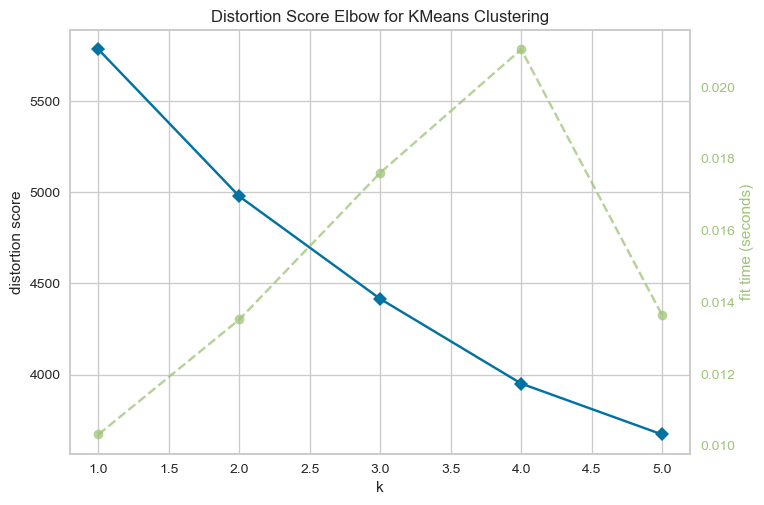

In [39]:
km = KMeans(n_init="auto")
elbow = KElbowVisualizer(km, k=(1, 6))
elbow.fit(X_scaled)
elbow.show();

### Silhouette Plots

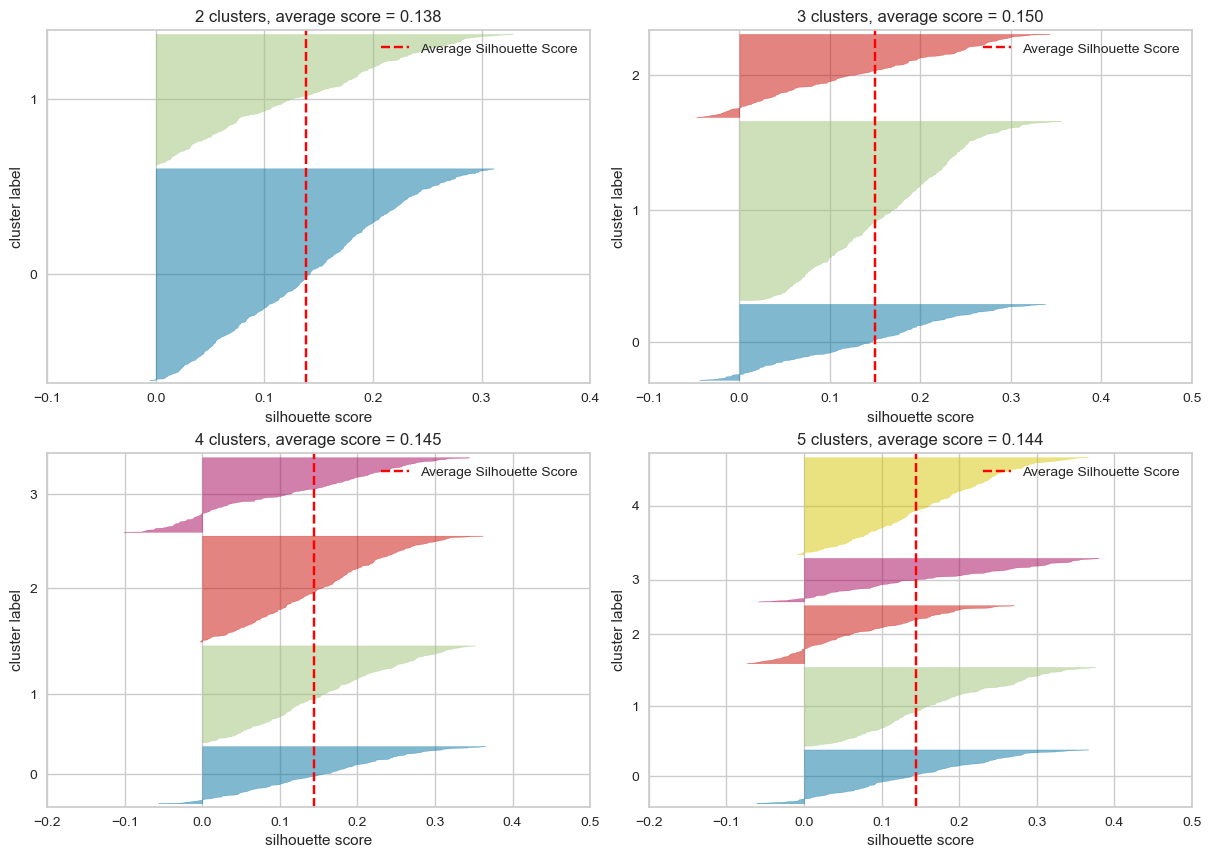

In [40]:
# Set figure layout
fig4 = plt.figure(constrained_layout=True, figsize=(12, 12))
gs = fig4.add_gridspec(3, 2)
ax411 = fig4.add_subplot(gs[0, 0])
ax412 = fig4.add_subplot(gs[0, 1])
ax413 = fig4.add_subplot(gs[1, 0])
ax421 = fig4.add_subplot(gs[1, 1])
ax_list = [ax411, ax412, ax413, ax421]

# Evaluate silhouette plots for 2 to 5 clusters
for i, n_clusters in enumerate(range(2, 6)):
    km = KMeans(n_clusters, n_init="auto", random_state=42)
    viz = SilhouetteVisualizer(km, ax=ax_list[i],
                               colors='yellowbrick')
    viz.fit(X)
    viz.finalize()
    viz.ax.set_title(
        f"{n_clusters} clusters, average score = {viz.silhouette_score_:0.3f}")
    viz.ax.set_xlabel("silhouette score")

On this analysis it can be seen that the "optimum" number of clusters is 3. Despite this, we only have two variables and we will be working with 2 different clusters.  

### CLUSTERING ALGORITHM TRIALS 

Despite having an "optimum" number of clusters equal to 3. Two clusters have been chosen in order to match Supination and Close-Hand. Once the number of clusters has been selected, Clustering Algorithm Trials can start, on this part two clustering methods have been tested in order to try to visualize if the dataset has some good results by clustering the data (more tests have been performed on Case 3). 

#### K-Means
The first method used is K-Means. This method minimizes the variance within each cluster, creating clusters of data points that are similar to each other. The amount of clusters will depend on the number of '*K*' initial centroids that will be chosen randomly from all the data. The following code implements the K-Means method. 

In [41]:
# Fit clustering and extract assigned clusters
km2 = KMeans(n_clusters=2, n_init="auto", random_state=42)
km2.fit(X_scaled)
df_standardized['2-means'] = km2.labels_

# Define the mapping from numeric labels to string labels
label_map = {0.0: 'CLOSE HAND', 1.0: 'SUPINATION'}

# Map the numeric labels to string labels
df_standardized['SUPINATION_str'] = df_standardized['SUPINATION'].map(label_map)

# Adjusted plotting function with simplified steps
def plot_data_clusters(ax, df_standardized, x, y, hue, title):
    # Check if hue is a list or array (indicating cluster labels)
    if isinstance(hue, (list, np.ndarray)):
        df_standardized['cluster_labels'] = hue
        hue = 'cluster_labels'
    
    print(f"Plotting {title} with hue: {hue}")
    print(df_standardized[[x, y, hue]].dropna().head())  # Print first few rows of data to be plotted

    sns.scatterplot(data=df_standardized,
                    x=x, y=y,
                    hue=hue,
                    palette="deep",
                    ax=ax)
    ax.set_title(title, size=14)

    # Adding KDE plot separately to handle potential issues
    try:
        sns.kdeplot(data=df_standardized,
                    x=x, y=y,
                    hue=hue,
                    alpha=0.5,
                    levels=3,
                    palette="deep",
                    ax=ax)
    except Exception as e:
        print(f"Failed to plot KDE: {e}")

In [42]:
print(df_standardized.head())
#print(df_standardized[['Mean_SCP','Skew_SCP', 'MeanFreq_SCP', 'PetrosianFD_Mu','MedianFreq_Beta', 'Mean_Beta']].info())

   PeakToPeak_SCP   Max_SCP  Mean_SCP   Var_SCP   Std_SCP  Skew_SCP  Kurt_SCP  \
0        0.564119  1.398358  0.457605 -0.197567 -0.109420  0.409524  0.385475   
1       -0.679417 -0.563462 -1.106688 -0.775208 -0.985903 -0.105430 -0.341479   
2        0.158354  0.129944 -0.932379 -0.005315  0.135176 -0.009200 -0.286588   
3       -1.303338 -1.145429  0.379819 -1.013873 -1.457174  0.390591 -0.798404   
4        0.200447  1.208215  0.013006  0.041990  0.192850  1.748297  0.110592   

   HiguchiFD_SCP  PetrosianFD_SCP  MeanFreq_SCP  ...  freqPeakPSD_Beta  \
0       0.640264         0.319450      0.197606  ...          0.384234   
1       1.214077         1.015382     -1.666081  ...          0.070334   
2      -0.007526         0.058476      0.729384  ...         -0.243565   
3       0.993054         1.102374     -0.822336  ...          1.415619   
4      -0.072001        -0.115507      0.180651  ...         -0.826522   

   spectralEntropy_Beta  SUPINATION  ln_MeanFreq_SCP  ln_Skew_SCP  \

Plotting Labelled Data with hue: SUPINATION_str
   MeanFreq_SCP  SUPINATION SUPINATION_str
0      0.197606           1     SUPINATION
1     -1.666081           1     SUPINATION
2      0.729384           1     SUPINATION
3     -0.822336           1     SUPINATION
4      0.180651           1     SUPINATION
Failed to plot KDE: cannot do a non-empty take from an empty axes.
Plotting Clustered Data with hue: 2-means
   MeanFreq_SCP  SUPINATION  2-means
0      0.197606           1        1
1     -1.666081           1        1
2      0.729384           1        0
3     -0.822336           1        1
4      0.180651           1        0


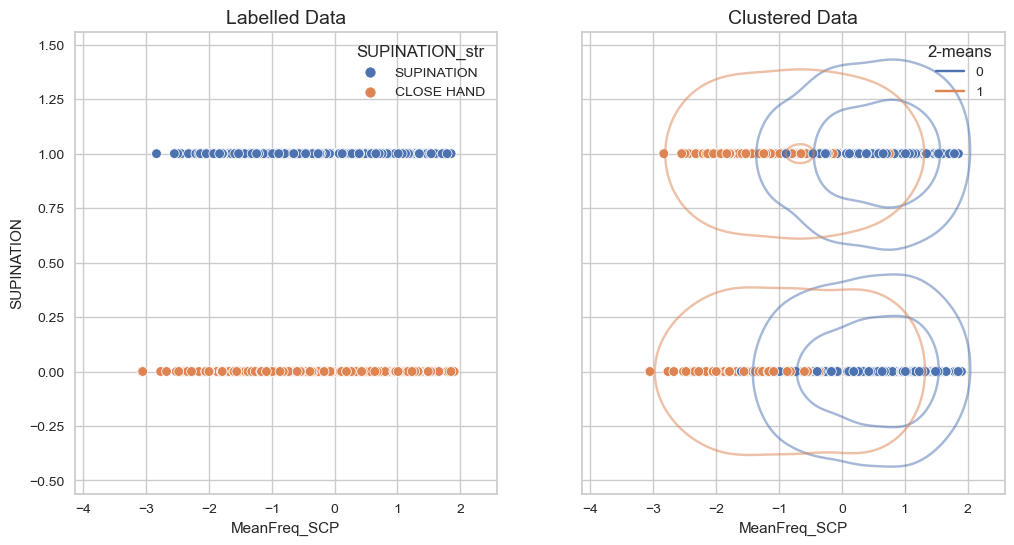

In [43]:
# Create a figure to compare labels and clusters
fig1, (ax11, ax12) = plt.subplots(
    nrows=1, ncols=2,
    sharex='all', sharey='all',
    figsize=(12, 6))

# Plotting labelled data
plot_data_clusters(ax11, df_standardized, 'MeanFreq_SCP', 'SUPINATION', 'SUPINATION_str', 'Labelled Data')

# Plot clustered data
plot_data_clusters(ax12, df_standardized, 'MeanFreq_SCP', 'SUPINATION', '2-means', 'Clustered Data')

#### Hierarchical Clustering

The second method tested is Hierarchical Clustering, which aims to build a hierarchy of clusters. For this part, the Agglomerative (Bottom-Up) Approach was chosen. This approach starts with each data point as its own cluster and iteratively merges the closest pairs of clusters until all data points belong to a single cluster.

Plotting Labelled Data with hue: SUPINATION_str
   MeanFreq_Mu  SUPINATION SUPINATION_str
0     0.420360           1     SUPINATION
1    -2.055636           1     SUPINATION
2    -0.982260           1     SUPINATION
3    -0.588068           1     SUPINATION
4    -0.596960           1     SUPINATION
Failed to plot KDE: cannot do a non-empty take from an empty axes.
Plotting Clustered Data with hue: 2-means
   MeanFreq_Mu  SUPINATION  2-means
0     0.420360           1        1
1    -2.055636           1        1
2    -0.982260           1        0
3    -0.588068           1        1
4    -0.596960           1        0


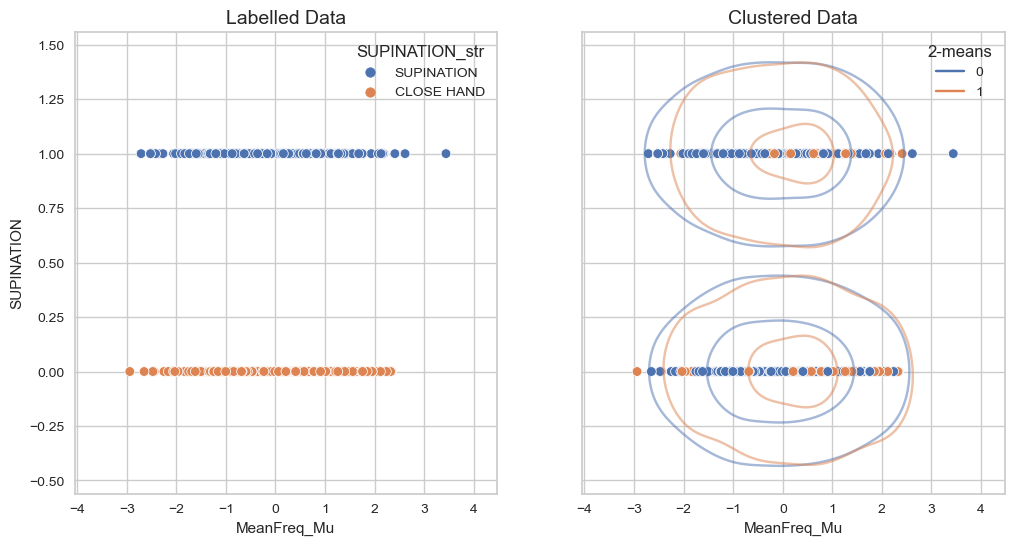

In [44]:
agg = AgglomerativeClustering(n_clusters=2,
                              metric='euclidean',
                              linkage='ward')
agg.fit(X_scaled)

# Create a figure to compare labels and clusters
fig5, (ax51, ax52) = plt.subplots(
    nrows=1, ncols=2,
    sharex='all', sharey='all',
    figsize=(12, 6))

# Plotting labelled data
plot_data_clusters(ax51, df_standardized, 'MeanFreq_Mu', 'SUPINATION', 'SUPINATION_str', 'Labelled Data')
# Add clustering labels to the dataset for plotting
data['Cluster'] = agg.labels_

# Map clusters to labels for the hue in the plot (if needed, otherwise use numbers directly)
cluster_label_map = {0: 'Cluster 0', 1: 'Cluster 1'}
data['Cluster_str'] = data['Cluster'].map(cluster_label_map)

# Plot clustered data
plot_data_clusters(ax52, df_standardized,  'MeanFreq_Mu', 'SUPINATION', '2-means', 'Clustered Data')

# Show the plot
plt.show()

As it can be seen, the clustering algorithms are not a really good technique to solve this kind of problematic. To do further research some classification algorithms have been tested. 

### CLASSIFICATION

Once the dataset has been studied and analyzed if the different clustering methods are good options to separate into groups the different points some classification algorithms have been tested in order to find an improvement on the previous results. 

The first thing that must be done when working with classification algorithms is to divide the dataset into **Training and Testing**. For this purpose the dataset has been divided into 60% Training and 40% Test. In order to do this in python, the following code has been used.

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from pathlib import Path
from sklearn.impute import SimpleImputer

from yellowbrick.model_selection import ValidationCurve, LearningCurve, validation_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from yellowbrick.classifier import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [46]:
# Divide dataset into train and test subsets           

selected_predictors = ['Mean_SCP','Skew_SCP', 'MeanFreq_SCP', 'PetrosianFD_Mu','MedianFreq_Beta', 'Mean_Beta']

X = df_standardized[selected_predictors]
y = df_standardized['SUPINATION']

# Split the dataset into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# Impute missing values instead of dropping, when dropping some issues appeared
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

Once the dataset is been separated between Training and Testing data, some algorithms can be tested in order to visualize the accuracy and analyze the results obtained. 

### CLASSIFICATION ALGORITHMS

In [47]:
# Definition of functions used on the different algorithms. Mostly used to analyze the results analytically and visually. 

def study_model(model, X, y, param_name,param_range):
    
    sizes = np.linspace(0.1, 1.0, 10)    
        
    # Validation curve

    vc = ValidationCurve(
        model, param_name=param_name,
        param_range=param_range, cv=10, scoring="r2"
    )
       
        
    vc.fit(X, y)
    vc.show()

    # Learning Curve
    lc = LearningCurve(
        model, cv=10, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
    )

    lc.fit(X, y)
    lc.show()           

    return model
    
def binary_classification(model, X_train, y_train, X_test, y_test):
    # Train model, use it to predict
    y_pred = model.fit(X_train, y_train).predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class
    
    # Calculate evaluation metrics
    cm = confusion_matrix(model,
                      X_train,
                      y_train,
                      X_test,
                      y_test,
                      is_fitted=True,
                      support=True,
                      cmap='RdYlGn')
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Display results
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("Roc AUC score:", roc_auc)
    
    # Roc curve
    # Calculate the false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='b', label='ROC Curve')
    plt.plot([0, 1], [0, 1], color='r', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
        
    # Classification report
    print(classification_report(y_pred, y_test))
    
    return model

In [48]:
def evaluate_classifier(model, X_train_imputed, y_train, X_test_imputed, y_test):
    # Train model, use it to predict
    y_pred = model.fit(X_train_imputed, y_train).predict(X_test_imputed)

    cm = confusion_matrix(model,
                          X_train_imputed,
                          y_train,
                          X_test_imputed,
                          y_test,
                          is_fitted=True,
                          support=True,
                          cmap='RdYlGn')

    # Classification report
    print(classification_report(y_pred, y_test))
    
    return model

### **LDA** 

The first classifier used is the **Linear Discriminant Analysis (LDA)**. This method projects high-dimensional data onto a lower-dimensional space with good-class separability. It assumes that different classes generate data based on Gaussian distributions with a shared covariance matrix. LDA aims to find a linear combination of features that best separates the classes, making it useful for dimensionality reduction and as a classifier for supervised learning tasks.

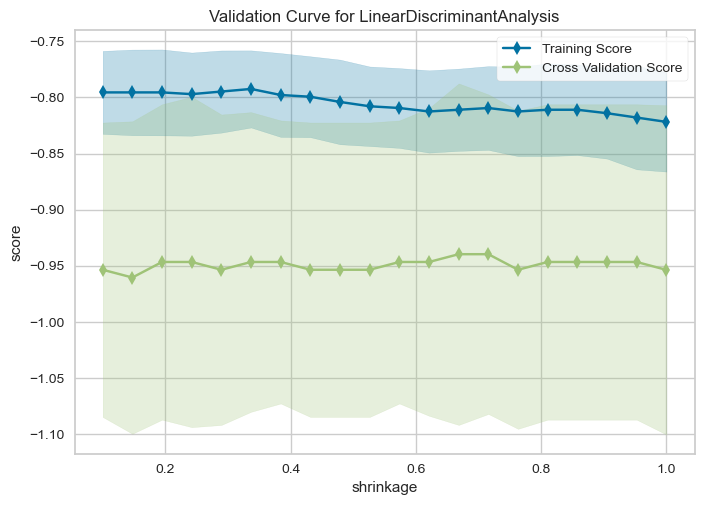

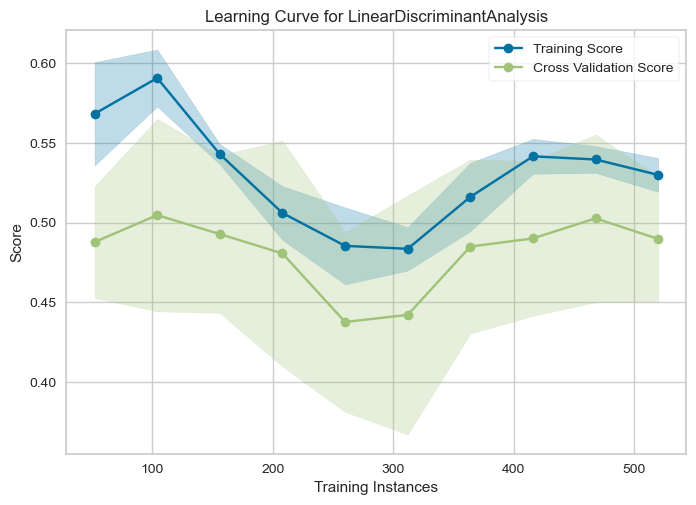

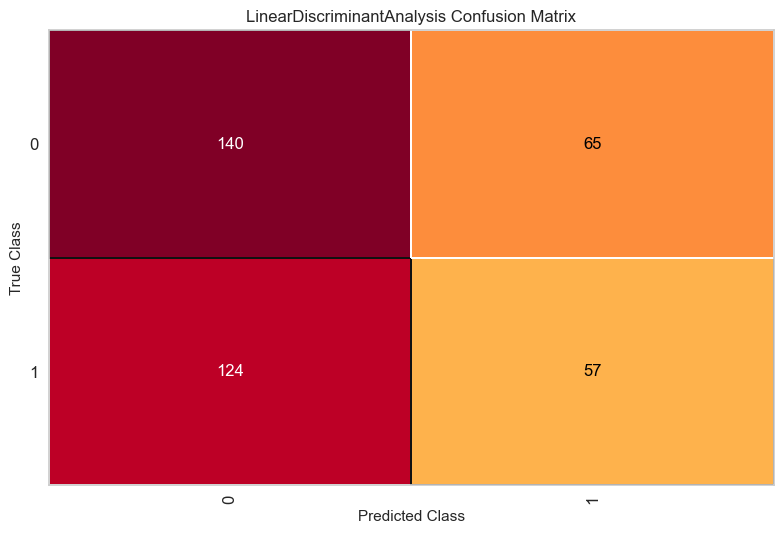

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       205
           1       0.47      0.31      0.38       181

    accuracy                           0.51       386
   macro avg       0.50      0.50      0.49       386
weighted avg       0.50      0.51      0.49       386



In [49]:
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report


# Instanciate model
lda_2 = LinearDiscriminantAnalysis(solver='lsqr')

# Train model and use it to predict
y_pred = lda_2.fit(X_train_imputed, y_train).predict(X_test_imputed)


study_model(lda_2, X_train_imputed, y_train,'shrinkage',np.linspace(0.1, 1, 20))

# Create confusion matrix
cm = ConfusionMatrix(lda_2)
cm.fit(X_train_imputed, y_train)
cm.score(X_test_imputed, y_test)
cm.show()

# Classification report
print(classification_report(y_test, y_pred))

#### *LDA ROC and precision-call curves*

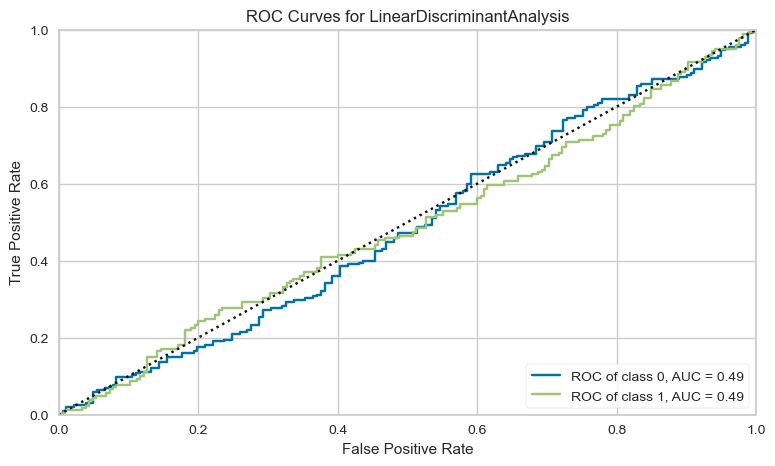

In [50]:
from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve

# ROC CURVE 
# Fit visualizer to our classifier
roc_viz = ROCAUC(lda_2,
                 is_fitted=True,
                 per_class=True,
                 micro=False,
                 macro=False,
                 size=(900, 500))
roc_viz.fit(X_train_imputed, y_train)
roc_viz.score(X_test_imputed, y_test)
roc_viz.show();

The LDA model's performance, as shown in the validation and learning curves, indicates significant overfitting with a low score, around -0.95 in cross-validation. The stable but low scores across different shrinkage values and varying training data sizes suggest that the model struggles to generalize well. The performance gap between training and validation scores highlights its inability to classify new data accurately. Overall, the model's current configuration is insufficient for effective classification and requires further data, regularization, or alternative modeling approaches for improvement.

### **Support Vector Machine**

The seventh and last method used is the Support Vector Machine (SVM). This supervised learning algorithm finds the hyperplane that best separates data into classes by maximizing the margin between classes. It can handle high-dimensional data and is effective in cases with clear margin separation

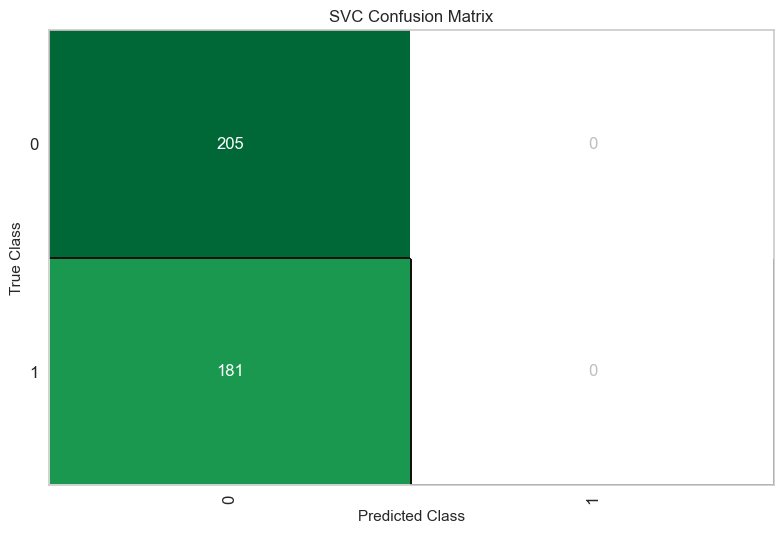

              precision    recall  f1-score   support

           0       1.00      0.53      0.69       386
           1       0.00      0.00      0.00         0

    accuracy                           0.53       386
   macro avg       0.50      0.27      0.35       386
weighted avg       1.00      0.53      0.69       386



In [51]:
# Confusion matrix
evaluate_classifier(SVC(kernel='linear'),
                    X_train_imputed,
                    y_train,
                    X_test_imputed,
                    y_test);

### **Decision Tree**

The fifth classifier method used is the Decision Tree. This model has a tree shape where each "*internal*" node represents a feature, each "*branch*" represents a decision rule, ane each "*leaf node*" represents the outcome.

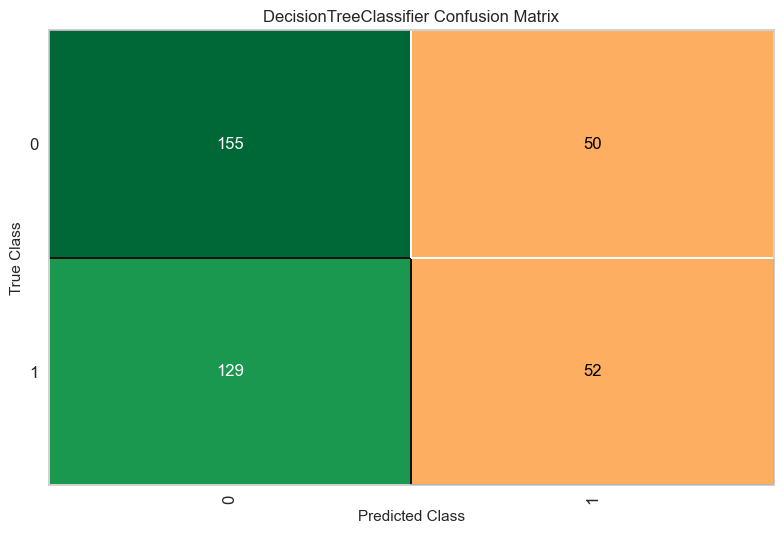

              precision    recall  f1-score   support

           0       0.76      0.55      0.63       284
           1       0.29      0.51      0.37       102

    accuracy                           0.54       386
   macro avg       0.52      0.53      0.50       386
weighted avg       0.63      0.54      0.56       386



In [52]:
# Confusion matrix
dt = evaluate_classifier(DecisionTreeClassifier(max_depth=10, random_state=42),
                    X_train_imputed,
                    y_train,
                    X_test_imputed,
                    y_test);

<div class="alert alert-block alert-info">
    <p>The results from the previous classification algorithms indicate that the performance for case 1 is very poor. The method fails to distinguish between supination and closing hand movements, classifying nearly all instances as closing hand. This inadequacy is evident in the ROC curves, which hover around 0.5. Given that the dataset consists of approximately 50% supination and 50% closing hand instances, the ROC curves reflect the model's inability to differentiate between the two classes effectively.</p>
</div>



## CASE 2: Features extracted after advanced preprocessing: xDAWN

The first thing that must be done in order to be sure that the data is balanced consists on feature scaling, this is done with the following code:

In [53]:
# Divide dataset into features and target
X = df_standardized_xDAWN[['Max_SCP','Var_SCP', 'RMS_SCP', 'HiguchiFD_SCP', 'PetrosianFD_SCP', 'spectralEntropy_Beta']]
y = df_standardized_xDAWN[['SUPINATION']]

# Feature scaling
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# Convert to dataframe
df_hfo_PAT1_st = pd.DataFrame(X_scaled,columns=X.columns)
df_hfo_PAT1_st = pd.concat([df_hfo_PAT1_st, y], axis=1)

In [54]:
X.isnull().sum()

Max_SCP                 0
Var_SCP                 0
RMS_SCP                 0
HiguchiFD_SCP           0
PetrosianFD_SCP         0
spectralEntropy_Beta    0
dtype: int64

One question that will appear once we have our data is in how many clusters should we divide it to have good results using clustering and classification methods later on. To do so, the Elbow Method allows a detection of the optimum number of clusters with the following lines of code:

### Elbow Method

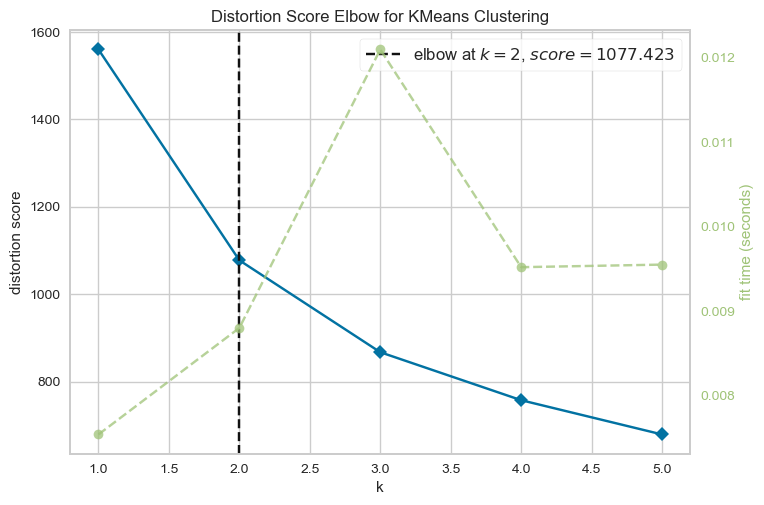

In [55]:
km = KMeans(n_init="auto")
elbow = KElbowVisualizer(km, k=(1, 6))
elbow.fit(X_scaled)
elbow.show();

### Silhouette Plots

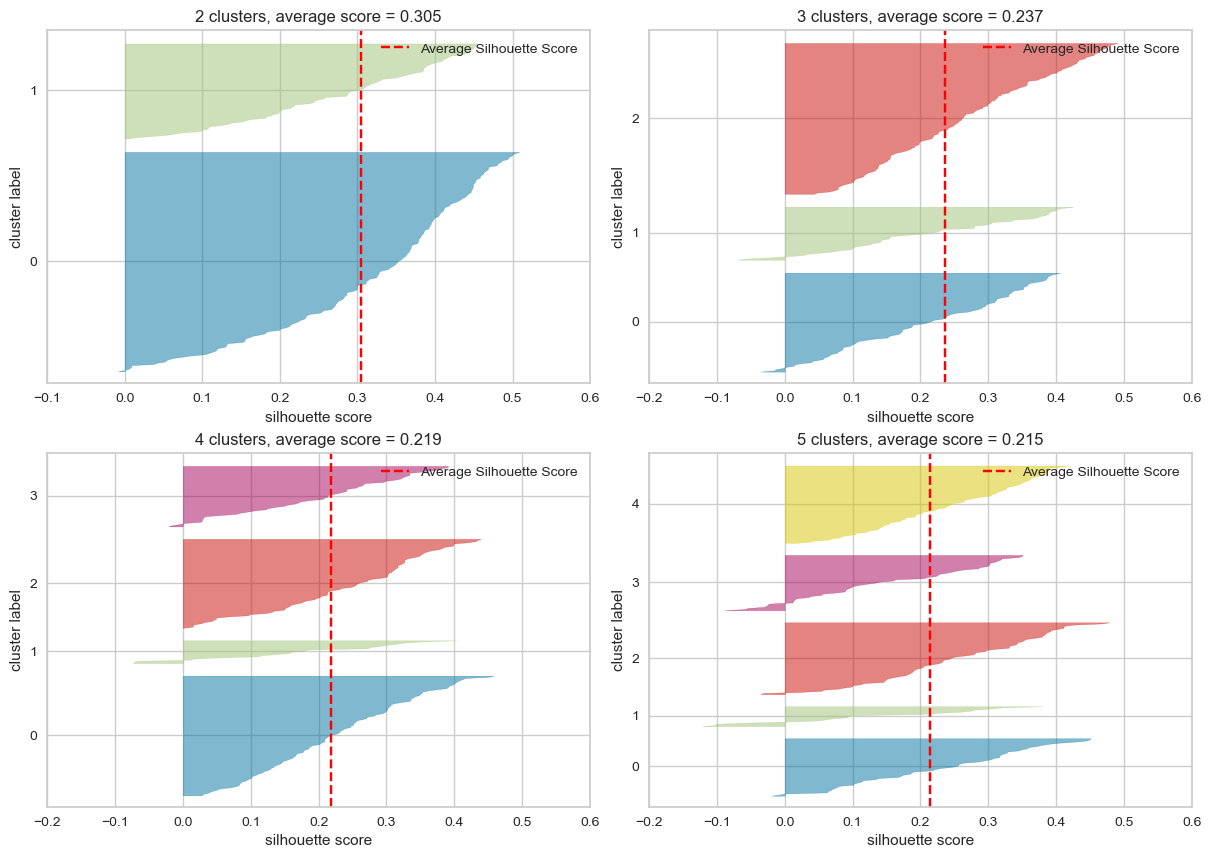

In [56]:
# Set figure layout
fig4 = plt.figure(constrained_layout=True, figsize=(12, 12))
gs = fig4.add_gridspec(3, 2)
ax411 = fig4.add_subplot(gs[0, 0])
ax412 = fig4.add_subplot(gs[0, 1])
ax413 = fig4.add_subplot(gs[1, 0])
ax421 = fig4.add_subplot(gs[1, 1])
ax_list = [ax411, ax412, ax413, ax421]

# Evaluate silhouette plots for 2 to 5 clusters
for i, n_clusters in enumerate(range(2, 6)):
    km = KMeans(n_clusters, n_init="auto", random_state=42)
    viz = SilhouetteVisualizer(km, ax=ax_list[i],
                               colors='yellowbrick')
    viz.fit(X)
    viz.finalize()
    viz.ax.set_title(
        f"{n_clusters} clusters, average score = {viz.silhouette_score_:0.3f}")
    viz.ax.set_xlabel("silhouette score")

On this analysis it can be seen that the "optimum" number of clusters is 2, which corresponds to the number of classes we have and also to the unbalance data we have.

### CLUSTERING ALGORITHM TRIALS 

Thus, two clusters have been chosen in order to match Supination and Close-Hand. Once the number of clusters has been selected, Clustering Algorithm Trials can start, on this part two clustering methods have been tested in order to try to visualize if the dataset has some good results by clustering the data (more tests have been performed on Case 3). 

#### K-Means
The first method used is K-Means. This method minimizes the variance within each cluster, creating clusters of data points that are similar to each other. The amount of clusters will depend on the number of '*K*' initial centroids that will be chosen randomly from all the data. The following code implements the K-Means method. 

In [57]:
# Fit clustering and extract assigned clusters
km2 = KMeans(n_clusters=2, n_init="auto", random_state=42)
km2.fit(X_scaled)
df_standardized_xDAWN['2-means'] = km2.labels_

# Define the mapping from numeric labels to string labels
label_map = {0.0: 'CLOSE HAND', 1.0: 'SUPINATION'}

# Map the numeric labels to string labels
df_standardized_xDAWN['SUPINATION_str'] = df_standardized_xDAWN['SUPINATION'].map(label_map)

# Adjusted plotting function with simplified steps
def plot_data_clusters(ax, df_standardized, x, y, hue, title):
    # Check if hue is a list or array (indicating cluster labels)
    if isinstance(hue, (list, np.ndarray)):
        df_standardized['cluster_labels'] = hue
        hue = 'cluster_labels'
    
    print(f"Plotting {title} with hue: {hue}")
    print(df_standardized[[x, y, hue]].dropna().head())  # Print first few rows of data to be plotted

    sns.scatterplot(data=df_standardized,
                    x=x, y=y,
                    hue=hue,
                    palette="deep",
                    ax=ax)
    ax.set_title(title, size=14)

    # Adding KDE plot separately to handle potential issues
    try:
        sns.kdeplot(data=df_standardized,
                    x=x, y=y,
                    hue=hue,
                    alpha=0.5,
                    levels=3,
                    palette="deep",
                    ax=ax)
    except Exception as e:
        print(f"Failed to plot KDE: {e}")

Plotting Labelled Data with hue: SUPINATION_str
    Max_SCP  SUPINATION SUPINATION_str
0 -0.635237           1     SUPINATION
1  0.282720           1     SUPINATION
2  4.977686           1     SUPINATION
3  0.285123           1     SUPINATION
4 -1.137301           1     SUPINATION
Failed to plot KDE: cannot do a non-empty take from an empty axes.
Plotting Clustered Data with hue: 2-means
    Max_SCP  SUPINATION  2-means
0 -0.635237           1        0
1  0.282720           1        0
2  4.977686           1        1
3  0.285123           1        1
4 -1.137301           1        0


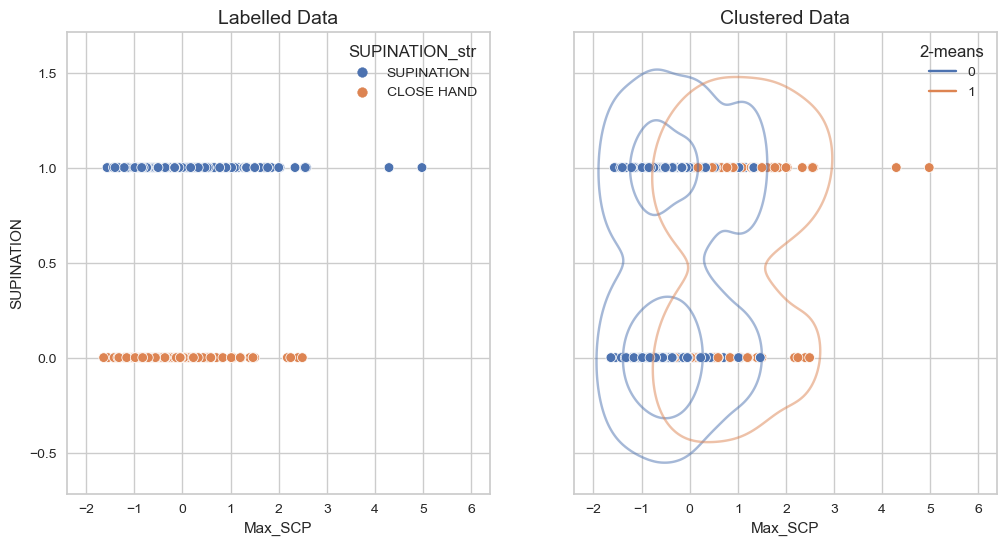

In [58]:
# Create a figure to compare labels and clusters
fig1, (ax11, ax12) = plt.subplots(
    nrows=1, ncols=2,
    sharex='all', sharey='all',
    figsize=(12, 6))

# Plotting labelled data
plot_data_clusters(ax11, df_standardized_xDAWN, 'Max_SCP', 'SUPINATION', 'SUPINATION_str', 'Labelled Data')

# Plot clustered data
plot_data_clusters(ax12, df_standardized_xDAWN, 'Max_SCP', 'SUPINATION', '2-means', 'Clustered Data')

#### Hierarchical Clustering

The second method tested is Hierarchical Clustering, which aims to build a hierarchy of clusters. For this part, the Agglomerative (Bottom-Up) Approach was chosen. This approach starts with each data point as its own cluster and iteratively merges the closest pairs of clusters until all data points belong to a single cluster.

Plotting Labelled Data with hue: SUPINATION_str
    Max_SCP  SUPINATION SUPINATION_str
0 -0.635237           1     SUPINATION
1  0.282720           1     SUPINATION
2  4.977686           1     SUPINATION
3  0.285123           1     SUPINATION
4 -1.137301           1     SUPINATION
Failed to plot KDE: cannot do a non-empty take from an empty axes.
Plotting Clustered Data with hue: 2-means
    Max_SCP  SUPINATION  2-means
0 -0.635237           1        0
1  0.282720           1        0
2  4.977686           1        1
3  0.285123           1        1
4 -1.137301           1        0


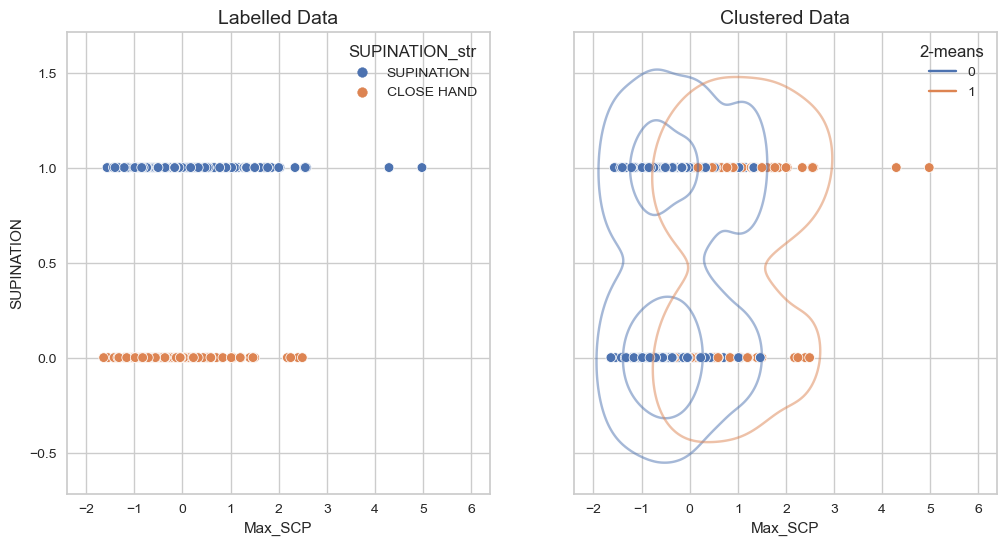

In [66]:
agg = AgglomerativeClustering(n_clusters=2,
                              metric='euclidean',
                              linkage='ward')
agg.fit(X_scaled)

# Create a figure to compare labels and clusters
fig5, (ax51, ax52) = plt.subplots(
    nrows=1, ncols=2,
    sharex='all', sharey='all',
    figsize=(12, 6))

# Plotting labelled data
plot_data_clusters(ax51, df_standardized_xDAWN, 'Max_SCP', 'SUPINATION', 'SUPINATION_str', 'Labelled Data')
# Add clustering labels to the dataset for plotting
data_xDAWN['Cluster'] = agg.labels_

# Map clusters to labels for the hue in the plot (if needed, otherwise use numbers directly)
cluster_label_map = {0: 'Cluster 0', 1: 'Cluster 1'}
data['Cluster_str'] = data['Cluster'].map(cluster_label_map)

# Plot clustered data
plot_data_clusters(ax52, df_standardized_xDAWN,  'Max_SCP', 'SUPINATION', '2-means', 'Clustered Data')

# Show the plot
plt.show()

As it can be seen, the clustering algorithms are not a really good technique to solve this kind of problematic. To do further research some classification algorithms have been tested. 

### CLASSIFICATION

Once the dataset has been studied and analyzed if the different clustering methods are good options to separate into groups the different points some classification algorithms have been tested in order to find an improvement on the previous results. 

The first thing that must be done when working with classification algorithms is to divide the dataset into **Training and Testing**. For this purpose the dataset has been divided into 60% Training and 40% Test. In order to do this in python, the following code has been used.

In [60]:
# Divide dataset into train and test subsets           

selected_predictors = ['Max_SCP','Var_SCP', 'RMS_SCP', 'HiguchiFD_SCP', 'PetrosianFD_SCP', 'spectralEntropy_Beta']

X = df_standardized_xDAWN[selected_predictors]
y = df_standardized_xDAWN['SUPINATION']

# Split the dataset into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# Impute missing values instead of dropping, when dropping some issues appeared
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

Once the dataset is been separated between Training and Testing data, some algorithms can be tested in order to visualize the accuracy and analyze the results obtained. 

### **LDA** 

The first classifier used is the **Linear Discriminant Analysis (LDA)**. This method projects high-dimensional data onto a lower-dimensional space with good-class separability. It assumes that different classes generate data based on Gaussian distributions with a shared covariance matrix. LDA aims to find a linear combination of features that best separates the classes, making it useful for dimensionality reduction and as a classifier for supervised learning tasks.

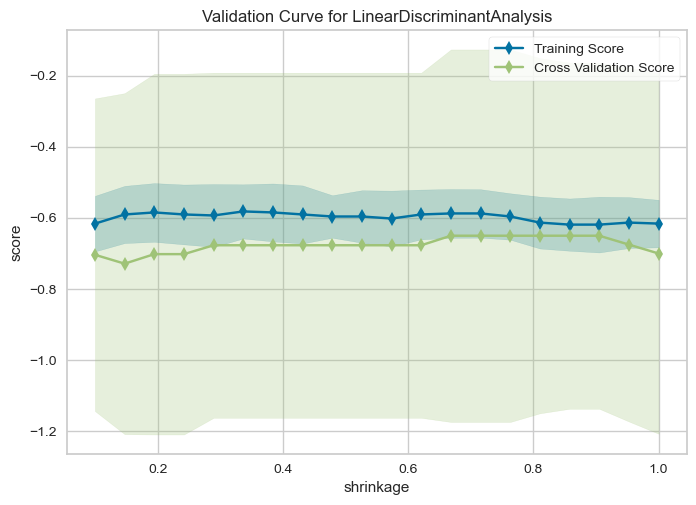

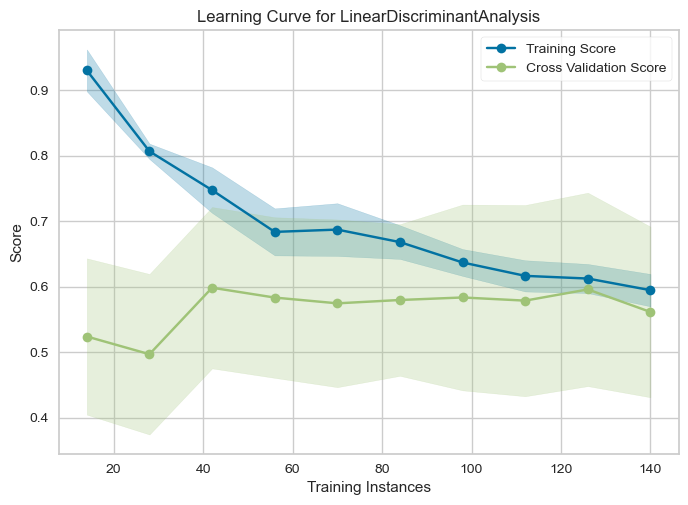

LinearDiscriminantAnalysis(solver='lsqr')

In [61]:
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report


# Instanciate model
lda_2 = LinearDiscriminantAnalysis(solver='lsqr')

# Train model and use it to predict
y_pred = lda_2.fit(X_train_imputed, y_train).predict(X_test_imputed)


study_model(lda_2, X_train_imputed, y_train,'shrinkage',np.linspace(0.1, 1, 20))

Regarding the validation curve, the flatness of the training, cross-validation, and validation score lines across different hyperparameter values suggests that the LDA model’s performance is not sensitive to changes in this particular hyperparameter. This could mean that the hyperparameter being varied does not have a significant impact on the model’s ability to generalize.

The learning curve shows that with few training instances, the model overfits (high training score but lower validation scores). As more data is added, the model generalizes better, indicated by increasing validation/test scores. This is a typical behavior where more data helps the model to learn the underlying pattern without memorizing the training data.

To summarize, the model benefits from more training data, as seen in the learning curve, which could lead to better generalization on unseen data and the shaded areas in both curves suggest some variance in the scores, but since they are not wide, the model’s performance is relatively stable, although the result is not so good.

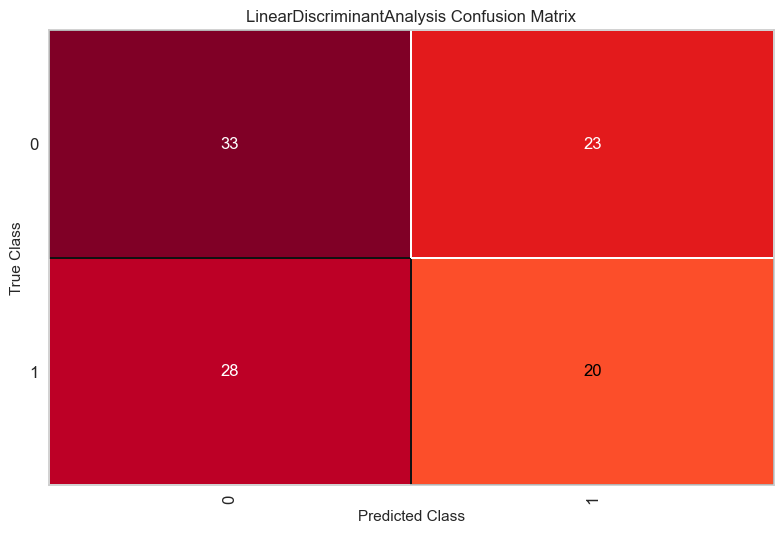

              precision    recall  f1-score   support

           0       0.54      0.59      0.56        56
           1       0.47      0.42      0.44        48

    accuracy                           0.51       104
   macro avg       0.50      0.50      0.50       104
weighted avg       0.51      0.51      0.51       104



In [62]:
# Create confusion matrix
cm = ConfusionMatrix(lda_2)
cm.fit(X_train_imputed, y_train)
cm.score(X_test_imputed, y_test)
cm.show()

# Classification report
print(classification_report(y_test, y_pred))

The model shows a balanced performance between the two classes with an overall accuracy of 50%. The precision, recall, and F1-scores are relatively low, indicating that the model may struggle to distinguish between the two classes effectively. The model has a similar number of false positives and false negatives, which contributes to its balanced recall and precision but also suggests room for improvement in classification accuracy.

#### *LDA ROC and precision-call curves*

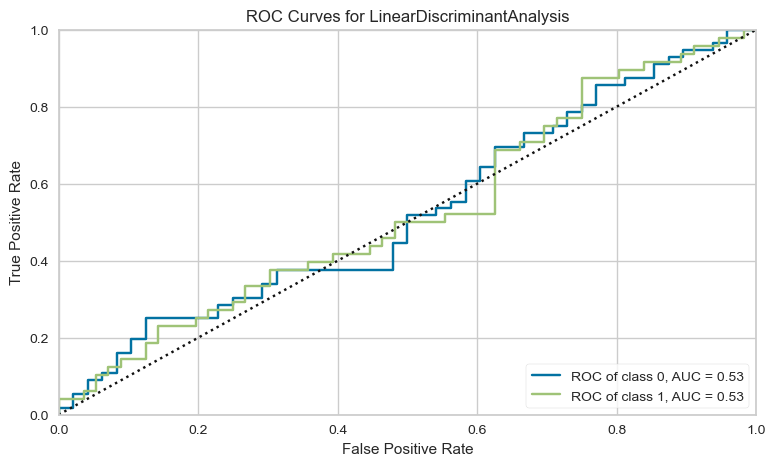

In [63]:
from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve

# ROC CURVE 
# Fit visualizer to our classifier
roc_viz = ROCAUC(lda_2,
                 is_fitted=True,
                 per_class=True,
                 micro=False,
                 macro=False,
                 size=(900, 500))
roc_viz.fit(X_train_imputed, y_train)
roc_viz.score(X_test_imputed, y_test)
roc_viz.show();

The model’s performance in classifying both classes is moderate, and there is room for improvement. The similar AUC values for both classes suggest that the model does not favor one class over the other in terms of predictive performance.

### **Support Vector Machine**

The seventh and last method used is the Support Vector Machine (SVM). This supervised learning algorithm finds the hyperplane that best separates data into classes by maximizing the margin between classes. It can handle high-dimensional data and is effective in cases with clear margin separation

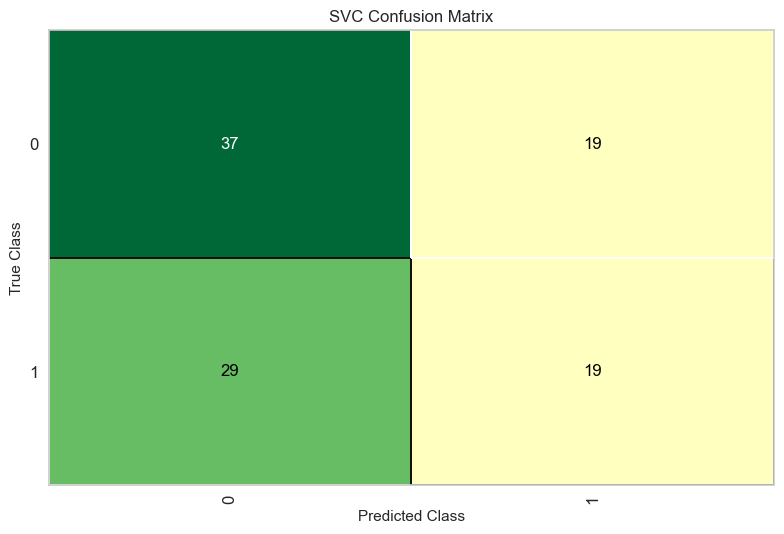

              precision    recall  f1-score   support

           0       0.66      0.56      0.61        66
           1       0.40      0.50      0.44        38

    accuracy                           0.54       104
   macro avg       0.53      0.53      0.52       104
weighted avg       0.56      0.54      0.55       104



In [64]:
# Confusion matrix
evaluate_classifier(SVC(kernel='linear'),
                    X_train_imputed,
                    y_train,
                    X_test_imputed,
                    y_test);

The SVC model shows a moderate performance with a slightly better recall for class ‘0’ (close hand) than class ‘1’ (supination), indicating it is more effective at identifying class ‘0’ instances. The precision is balanced between the two classes. The overall accuracy of 54% suggests that the model is performing better than random chance but still has room for improvement. The macro and weighted averages indicate that the model’s performance is fairly consistent across both classes.

### **Decision Tree Classifier**

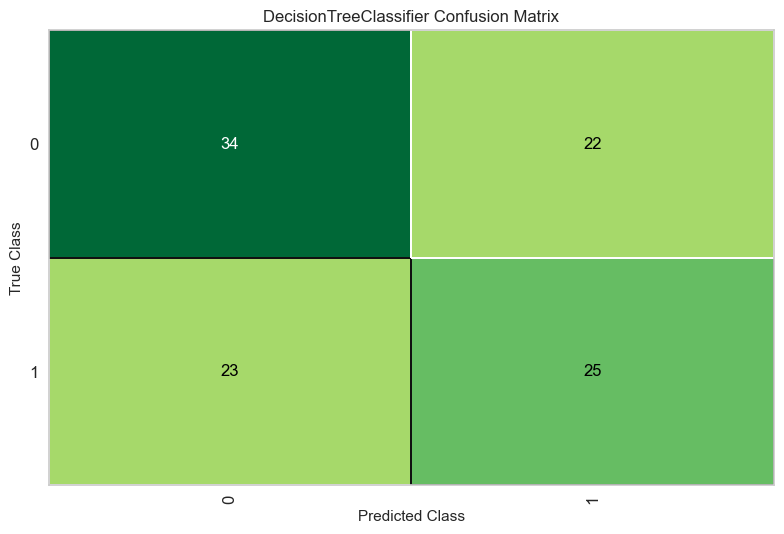

              precision    recall  f1-score   support

           0       0.61      0.60      0.60        57
           1       0.52      0.53      0.53        47

    accuracy                           0.57       104
   macro avg       0.56      0.56      0.56       104
weighted avg       0.57      0.57      0.57       104



In [65]:
# Confusion matrix
dt = evaluate_classifier(DecisionTreeClassifier(max_depth=10, random_state=42),
                    X_train_imputed,
                    y_train,
                    X_test_imputed,
                    y_test);

The decision tree model has a higher number of true positives and true negatives compared to false positives and false negatives, which is a good sign. However, the number of false positives and false negatives is relatively close to the number of true values, indicating that there is room for improvement in the model’s predictive accuracy. 

In our case, even though the results are not very good, the Decision Tree might have a better performance in terms of certain metrics like accuracy, precision, recall, or F1-score compared to LDA and SVM.

<div class="alert alert-block alert-info">
    <p>The Decision Tree Classifier appears to be the best performer among the three models, despite the overall moderate results. It provides a good balance between interpretability and predictive power, making it a suitable choice for applications where these factors are important. However, the choice of the model should also consider the specific context of the application, including the importance of false positives and negatives and the alignment with the classification task’s goals.
</div>

## CASE 3: Features extracted after advanced preprocessing: Common Spatial Patterns (CSP)

<div class="alert alert-info" role="alert", style="border-radius: 70px">
    <h2 style="text-align: center; margin-top:0.5cm; margin-bottom:0.5cm; font-size:20px">Part 4. Results: testing the classifier on "unseen" EEG</h2>
</div>

<div class="alert alert-info" role="alert", style="border-radius: 70px">
    <h2 style="text-align: center; margin-top:0.5cm; margin-bottom:0.5cm; font-size:20px">Part 5. FINAL CONCLUSION</h2>
</div>